# Problem Statement
#### - Prepared by Tapas and Kaliraj

 Telecom Churn Case study - To analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
 
 ##### Dataset
 The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
 
  ###### Please note Dataset is placed in the working folder
 
 
 #### Business Objective
 
 To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.Need to define high-value customers based on a certain metric and predict the churn only on high value customers.
 
 Background: In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

### Steps:

1. Understanding & Preparing the Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Modelling
5. Model Evaluation
6. Observations and Recommendations

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# MOdel selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

# Model hyper parameter tuning
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## 1.  Understanding & Preparing the Data

In [2]:
# Reading the csv file and putting it into 'df' object.
df_telco = pd.read_csv(r"telecom_churn_data.csv")
df_telco.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data inspection

In [3]:
#Display dimension of the data
df_telco.shape

(99999, 226)

In [4]:
# Lets go thru the list of columns
df_telco.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
# Lets inspect the column wise count of non null entries count & datatype  for each column
df_telco.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
# Lets check the statistical aspects of numerical data
df_telco.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Exploration 

Below steps need to be done:

- Deriving Key feature: Total recharge amount data & Avg Good Phase reharge amount
- Need to filter high value customers
- Need to tag churners and remove attributes of the churn phase
- Remove all the attributes corresponding to the churn phase.



#### Derive a new feature

The ‘good’ phase: In this phase, the customer is happy with the service provided by telecom operator and behaves as usual.

Since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase


In [7]:
#Lets calculate the Total recharge amount data and save them in a column
df_telco['total_rech_amt_data_6']= df_telco['total_rech_data_6']*df_telco['av_rech_amt_data_6']
df_telco['total_rech_amt_data_7']= df_telco['total_rech_data_7']*df_telco['av_rech_amt_data_7']
df_telco['total_rech_amt_data_8']= df_telco['total_rech_data_8']*df_telco['av_rech_amt_data_8']
df_telco['total_rech_amt_data_9']= df_telco['total_rech_data_9']*df_telco['av_rech_amt_data_9']

In [8]:
#Finding the shape of the dataframe
df_telco.shape

(99999, 230)

In [9]:
df_telco[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [10]:
#Dropping the total_rech_data and av_rech_amt_data for all the four months 
#as it will be redundant to have total recharge amount data and these two columns

#Dropping the columns
df_telco.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
              axis=1, inplace=True)

In [11]:
#Finding the shape of the dataframe
df_telco.shape

(99999, 222)

#### Filter High Value Customers

The high value customers have to be filtered baed on below condition:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [12]:
# Deriving new feature- Average recharge amount during good phase
# create a new column to capture average recharge per customer for the first 2 months
df_telco['Avg_good_phase_recharge'] =((df_telco['total_rech_amt_6'].fillna(0)+df_telco['total_rech_amt_data_6'].fillna(0))+(df_telco['total_rech_amt_7'].fillna(0)+df_telco['total_rech_amt_data_7'].fillna(0)))/2

In [13]:
# as per the condition lets calculate the 70th percentile of calculated average amount
seventy_percentile = np.percentile(df_telco['Avg_good_phase_recharge'], 70)
High_Value_Cust_df = df_telco[(df_telco['Avg_good_phase_recharge'] > seventy_percentile)]
# Display the dimension of the data
High_Value_Cust_df.shape

(29953, 223)

#### Tag churners and remove attributes of the churn phase

Tagging of churners needs to be done based on following columns
- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

There are no null values in the above columns

In [14]:
#Checking the condition that Incomming,outgoing calls and data volumne are not equal to zero 
High_Value_Cust_df['churn'] = (
    (High_Value_Cust_df['total_ic_mou_9'] == 0) &
    (High_Value_Cust_df['total_og_mou_9'] == 0) &
    (High_Value_Cust_df['vol_2g_mb_9'] == 0) &
    (High_Value_Cust_df['vol_3g_mb_9'] == 0)).astype(int)


In [15]:
# View the data dimension
High_Value_Cust_df.shape

(29953, 224)

In [16]:
# To view the number of churn and non-churn customers:
print('Churn customers: ',len(High_Value_Cust_df[High_Value_Cust_df['churn']==1]))
print('Non-Churn customers: ',len(High_Value_Cust_df[High_Value_Cust_df['churn']==0]))

Churn customers:  2433
Non-Churn customers:  27520


In [17]:
#To view the percenatge of churns 
(High_Value_Cust_df['churn'].value_counts()/len(High_Value_Cust_df)*100).round(2)

0    91.88
1     8.12
Name: churn, dtype: float64

###### Percentage of Churn and Non-Churn customers from the total number of customers
- Churn: 8.12%
- Non-Churn: 91.88%

# 2. Data Cleaning

#### Renaming the columns in the correct format

In [18]:
#Renaming the following columns in the format following the convention in the dataset i.e. appending with the month number
# jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g

High_Value_Cust_df.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace=True)


#### Remove all the attributes corresponding to the churn phase.

In [19]:
# Fetch all the rows ending with 9 i.e. September
arr_all_columns = list(High_Value_Cust_df.columns)
arr_churned_month_cols = filter(lambda item: '_9' in item, arr_all_columns)
list_churned_month_cols=list(arr_churned_month_cols)

print("List of the columns of 9th Month that are to be deleted:\n")
print(list(list_churned_month_cols),"\n")
print("Count of 9th Month columns to be deleted: ", len(list_churned_month_cols))


List of the columns of 9th Month that are to be deleted:

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9

In [20]:
# drop all the columns related to month 9 i.e. September
High_Value_Cust_df.drop(list_churned_month_cols, axis=1, inplace=True)

High_Value_Cust_df.shape

(29953, 170)

In [21]:
#Dropping the column that was added to calculate th average of good phase
High_Value_Cust_df.drop('Avg_good_phase_recharge', axis=1, inplace=True)
High_Value_Cust_df.shape

(29953, 169)

Before we treat null values,Lets find the unique number of values equal to 1. If there is only one unique value ,it wont have much value to model building

#### Checking unique values in the columns

In [22]:
# Checking the uniue values in the data set
pd.set_option('display.max_rows', None)
pd.DataFrame(High_Value_Cust_df.nunique())

,0
mobile_number,29953
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
arpu_6,29029
arpu_7,29040


In [23]:
#Lets find the columns with only one unique values in the column
cols_with_one_val=list(High_Value_Cust_df.columns[High_Value_Cust_df.nunique()==1])
cols_with_one_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [24]:
# Lets Drop the columns having unique number of value as statetd earlier
#If there is only one unique value for a column,it wont have much value to model building
##### mobile_number --- can't be used for either prediction or interpretation but not dropping as we need to see predicted churn of customers
# circle_id --- single value
# 'date' columns --- single value
# remaining columns --- single value '0'

High_Value_Cust_df.drop(columns=cols_with_one_val, inplace=True)

High_Value_Cust_df.shape

(29953, 156)

##### Checking and treating the null values

#### Checking and treating the incorrect data types

In [25]:
#Checking the datatype of the dataframe columns
High_Value_Cust_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 156 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             29953 non-null  int64  
 1   arpu_6                    29953 non-null  float64
 2   arpu_7                    29953 non-null  float64
 3   arpu_8                    29953 non-null  float64
 4   onnet_mou_6               29411 non-null  float64
 5   onnet_mou_7               29417 non-null  float64
 6   onnet_mou_8               28781 non-null  float64
 7   offnet_mou_6              29411 non-null  float64
 8   offnet_mou_7              29417 non-null  float64
 9   offnet_mou_8              28781 non-null  float64
 10  roam_ic_mou_6             29411 non-null  float64
 11  roam_ic_mou_7             29417 non-null  float64
 12  roam_ic_mou_8             28781 non-null  float64
 13  roam_og_mou_6             29411 non-null  float64
 14  roam_

##### From above info we can see that all the date columns are of object type, So, we need to fetch the date columns to handle

In [26]:
#Fetching all the date columns from the dataframe
date_cols =High_Value_Cust_df.columns[High_Value_Cust_df.columns.str.contains('date')]
print(date_cols)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [27]:
# Null values
nullval_df = ((High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df))*100).round(2)

nullval_df= nullval_df.drop(nullval_df[nullval_df==0].index).sort_values(ascending=False)
nullval_df

total_rech_amt_data_8       46.80
arpu_2g_8                   46.80
date_of_last_rech_data_8    46.80
count_rech_2g_8             46.80
count_rech_3g_8             46.80
arpu_3g_8                   46.80
max_rech_data_8             46.80
night_pck_user_8            46.80
fb_user_8                   46.80
arpu_2g_6                   44.11
fb_user_6                   44.11
date_of_last_rech_data_6    44.11
arpu_3g_6                   44.11
night_pck_user_6            44.11
total_rech_amt_data_6       44.11
count_rech_3g_6             44.11
max_rech_data_6             44.11
count_rech_2g_6             44.11
night_pck_user_7            43.12
max_rech_data_7             43.12
total_rech_amt_data_7       43.12
date_of_last_rech_data_7    43.12
arpu_2g_7                   43.12
count_rech_3g_7             43.12
fb_user_7                   43.12
arpu_3g_7                   43.12
count_rech_2g_7             43.12
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_8             3.91
std_ic_t2t_mou

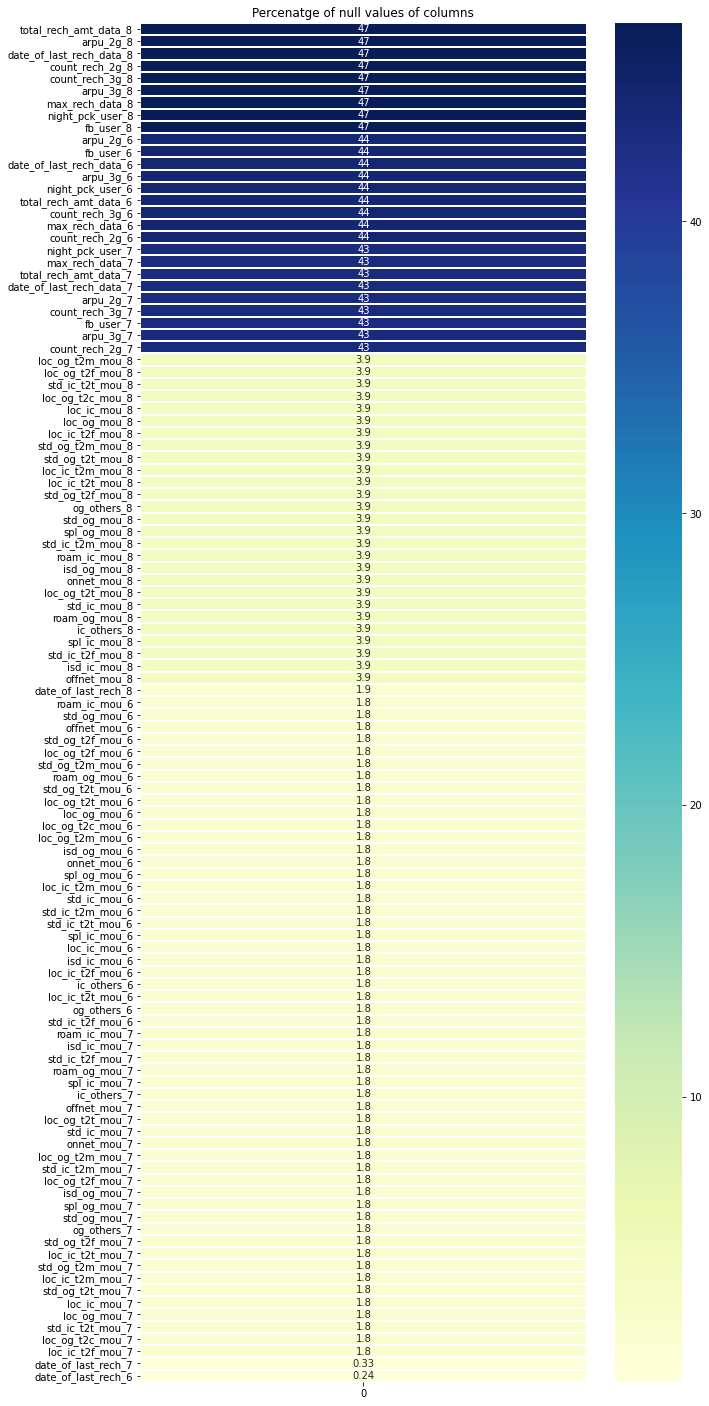

In [28]:
## Now we look at the null values
# Finding the Percentage of null values in each column
plt.figure(figsize=(10,25))
#Finding the sum of the null values
null_data =round(100*(High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df.index)), 2)
null_data= null_data[null_data!=0] # removing zeros
#Plotting the heat map
sns.heatmap(pd.DataFrame(null_data.sort_values(ascending=False)),annot=True,cmap="YlGnBu",linewidth=1,linecolor="white")
#Adding the title to the map
plt.title("Percenatge of null values of columns")
plt.show() 

In [29]:
High_Value_Cust_df.shape

(29953, 156)

In [30]:
#Deleting arpu_2g, arpu_3g for the months 6,7 & 8 as has large number of null values
arpu_cols=['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']
High_Value_Cust_df.drop(columns=arpu_cols, inplace=True)

In [31]:
#Findind the shape of the data frame
High_Value_Cust_df.shape

(29953, 150)

In [32]:
#Replacing all the data fields having the null values with 0
data_6=["total_rech_amt_data_6", "count_rech_2g_6", "count_rech_3g_6", "max_rech_data_6", "night_pck_user_6", "fb_user_6"]
data_7=["total_rech_amt_data_7", "count_rech_2g_7", "count_rech_3g_7", "max_rech_data_7", "night_pck_user_7", "fb_user_7"]
data_8=["total_rech_amt_data_8", "count_rech_2g_8", "count_rech_3g_8", "max_rech_data_8", "night_pck_user_8", "fb_user_8"]

# replaceing null values by 0 for data usage variables
High_Value_Cust_df.loc[:, data_6] = High_Value_Cust_df.loc[:, data_6].replace(np.NaN,0)
High_Value_Cust_df.loc[:, data_7] = High_Value_Cust_df.loc[:, data_7].replace(np.NaN,0)
High_Value_Cust_df.loc[:, data_8] = High_Value_Cust_df.loc[:, data_8].replace(np.NaN,0)


In [33]:
# Checking the null percenatge
null_data =round(100*(High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df.index)), 2)
null_data= null_data[null_data!=0] # removing zeros
null_data


onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.81
loc_og_mou_7                 1.79
loc_og_mou_8                 3.91
std_og_t2t_mou_6             1.81
std_og_t2t_mou_7             1.79
std_og_t2t_mou

In [34]:
# Treating null values
# as we can see above most of the columns belongs to minutes of usage(mou) .we can fill all those columns with zero
# selecting and assigning  the MOU columns
mou_cols =High_Value_Cust_df.columns[High_Value_Cust_df.columns.str.contains('mou')]
# replaceing null values by 0 for minutes of usage variables
High_Value_Cust_df.loc[:,mou_cols] = High_Value_Cust_df.loc[:,mou_cols].replace(np.NaN,0)

In [35]:
# Checking the null percenatge
null_data =round(100*(High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df.index)), 2)
null_data= null_data[null_data!=0] # removing zeros
null_data

og_others_6                  1.81
og_others_7                  1.79
og_others_8                  3.91
ic_others_6                  1.81
ic_others_7                  1.79
ic_others_8                  3.91
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

In [36]:
# OG_others and IC_other indicates no outgoing and incomming to others
# we can replace the OG_others and IC_other with zero
others_cols=['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8']
# replaceing null values by 0 for ic/og others variables
High_Value_Cust_df.loc[:,others_cols] = High_Value_Cust_df.loc[:,others_cols].replace(np.NaN,0)

In [37]:
# Checking the null percenatge
null_data =round(100*(High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df.index)), 2)
null_data= null_data[null_data!=0] # removing zeros
null_data

date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

In [38]:
#Finding all the date columns in the data frame
date_cols =High_Value_Cust_df.columns[High_Value_Cust_df.columns.str.contains('date')]
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [39]:
# format all last_recharge date values to a uniform format : That day of the month where last it got recharged
for col in date_cols:
    print(col)
    High_Value_Cust_df[col] = pd.to_datetime(High_Value_Cust_df[col])
    # Assigning day of the month
    High_Value_Cust_df[col] = High_Value_Cust_df[col].dt.day
    #filling the null values with 0
    High_Value_Cust_df[col].fillna(0,inplace=True)


date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [40]:
# Checking the null percenatge
null_data =round(100*(High_Value_Cust_df.isnull().sum()/len(High_Value_Cust_df.index)), 2)
null_data= null_data[null_data!=0] # removing zeros
null_data

Series([], dtype: float64)

##### Finally, we have no null values in the dataframe.

# 3. Exploratory Data Analysis

In [41]:
# Over here churn is the target variable which Indicates whether a customer will be churned (1) or not (0).

##### Analysis on Recharge amount related attributes

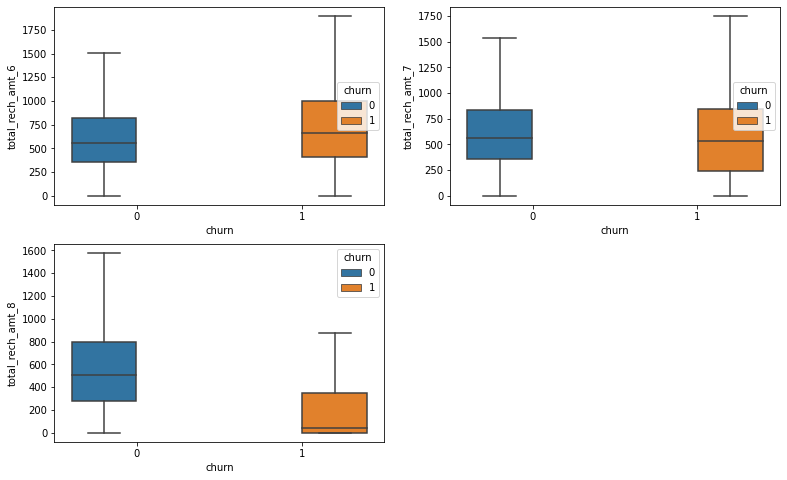

In [42]:
# Lets consider the Recharge amount columns

# Consider the columns of total recharge amount of the 3 months
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
# Plotting sub plot
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='total_rech_amt_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=High_Value_Cust_df, y='total_rech_amt_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=High_Value_Cust_df, y='total_rech_amt_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()


###### In the 8th month (Action phase) there is a drop in total recharge amount of the churn customers

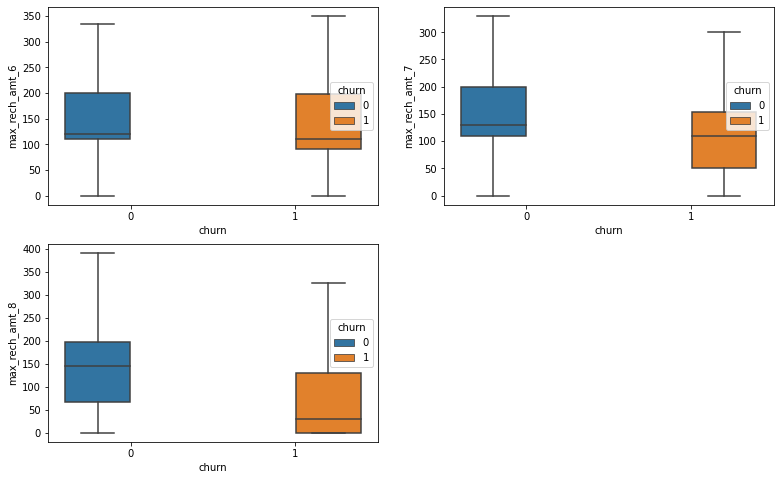

In [43]:

# Consider the columns of maximium amount of the 3 months
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
# Plotting sub plot
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='max_rech_amt_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=High_Value_Cust_df, y='max_rech_amt_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=High_Value_Cust_df, y='max_rech_amt_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()

###### In the 8th month (Action phase) there is a huge drop in maximum recharge amount for data for churned customers.

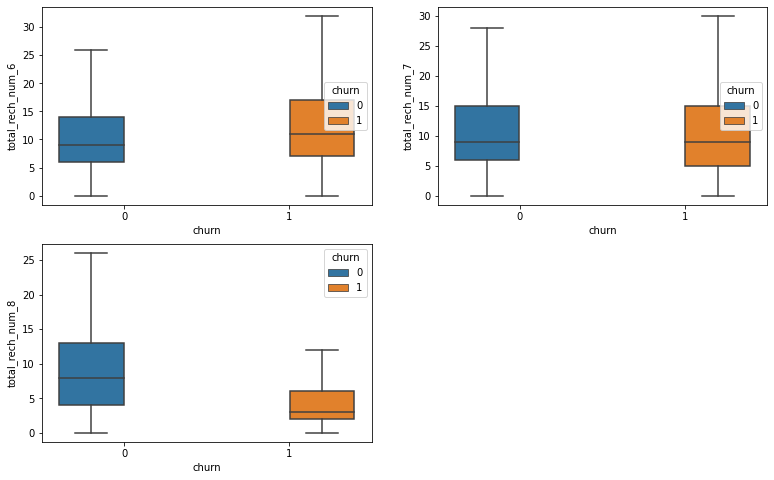

In [44]:
# Consider the columns of total number of recharges
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
# Plotting sub plot
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='total_rech_num_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=High_Value_Cust_df, y='total_rech_num_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=High_Value_Cust_df, y='total_rech_num_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()

###### In the 8th month (Action phase) there is a drop in total recharge number also for churned customers.

###### Analysis on 2G/3G usage attributes

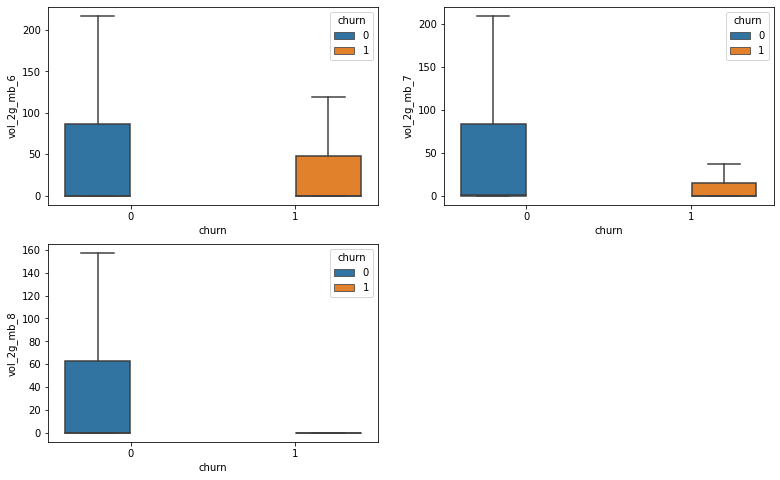

In [45]:
# Consider the columns provide the volume of 2g usages
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
# Plotting sub plot
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='vol_2g_mb_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=High_Value_Cust_df, y='vol_2g_mb_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=High_Value_Cust_df, y='vol_2g_mb_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()

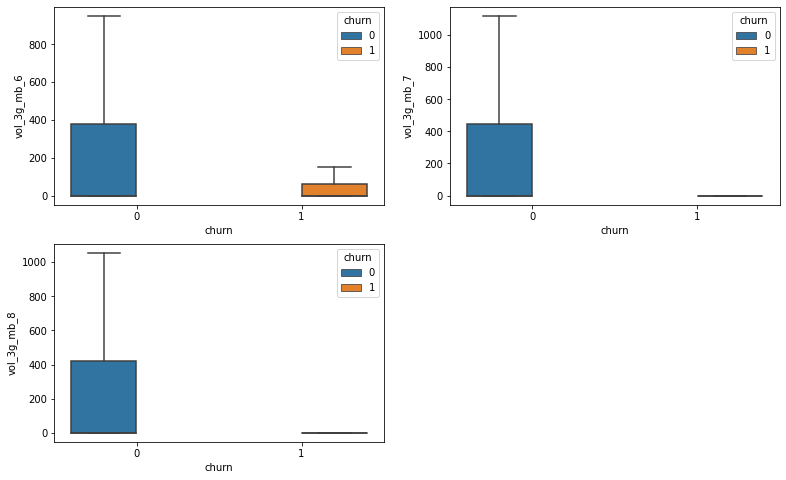

In [46]:
# Consider the columns provide the volume of 3g usages
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
# Plotting sub plot
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='vol_3g_mb_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=High_Value_Cust_df, y='vol_3g_mb_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=High_Value_Cust_df, y='vol_3g_mb_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()

#### Analysis:
- 2G and 3G usage for churned customers is very less

- Churned customers has less usage of data .This can be interpreted as areas where churned customers has less coverage on data network

##### Analysis on 2G/3G Schemes and VBC

In [47]:
# A functon to display bar chart when columns are passed
# Plotting over here is based on avaerge
# df- Datasetname
# Columns_list list of columns to pass
def mean_bar_chart_plot(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

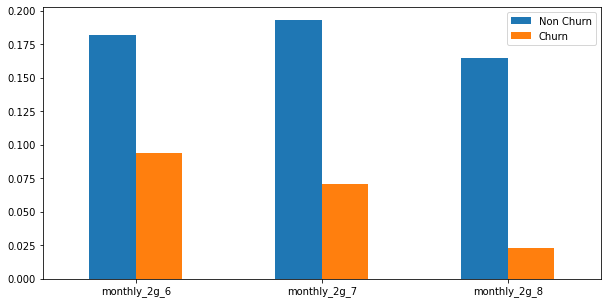

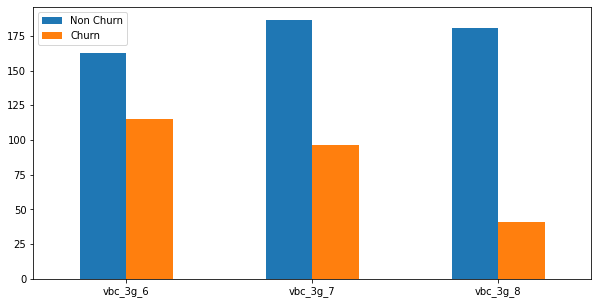

In [48]:
# Consider the below columns to be provided for plotting mean bar chart based on
# 1. 23/3g scheme 
# 2. Voice based scheme(VBC)

cols=['monthly_2g_6','monthly_2g_7','monthly_2g_8']
#Plotting bar chart by taking the average (2G/3G scheme)
mean_bar_chart_plot(High_Value_Cust_df, cols)
cols=['vbc_3g_6','vbc_3g_7','vbc_3g_8']
#Plotting bar chart by taking the average (Volume based schme)
mean_bar_chart_plot(High_Value_Cust_df, cols)
plt.show()

##### Analysis:

It is clearly visisble that the Churn Customers opted less for 2G/3G schemes and Volume based subscription in all 3 months.
However there is major dip on 8th (august) month

###### Analysis on sachet (Service schemes with validity smaller than a month) and Monthly scheme  -2G/3G

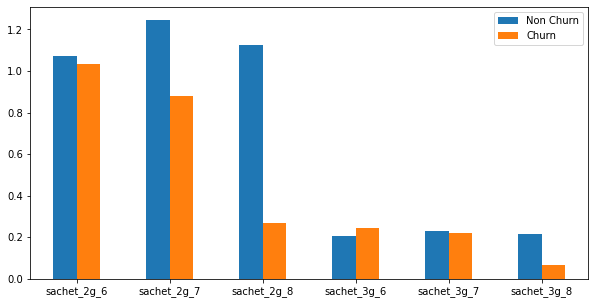

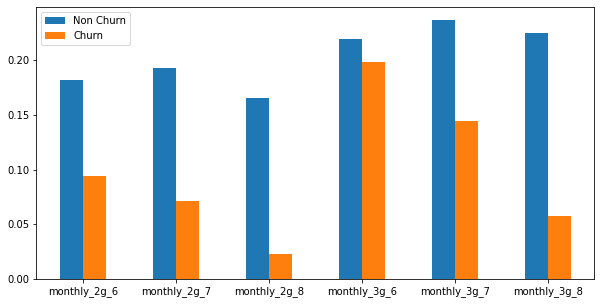

In [49]:
# Consider the below columns to be provided for plotting mean bar chart based on:
# 1. sachet (Service schemes with validity smaller than a month)-2g/3G 
# 2. Monthly Scheme- Service schemes with validity equivalent to a month

cols=['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8']
#Plotting bar chart by taking the average (2G/3G scheme)
mean_bar_chart_plot(High_Value_Cust_df, cols)
cols=['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
#Plotting bar chart by taking the average (Monthly Scheme-2g/3g)
mean_bar_chart_plot(High_Value_Cust_df, cols)
plt.show()


##### Analysis
There is drop in Sachet and monthly services on 8th month for churned customers

##### Analysis on ARPU (Average revenue per user) 

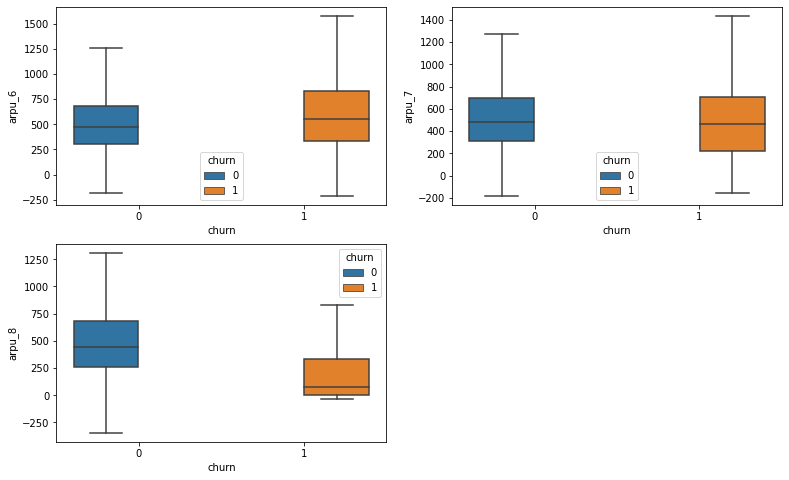

In [50]:
# Consider the columns to be provide 1.Average revenue per user
plt.figure(figsize=(13,8))
#Plotting the box plot of number churs vs non Churners
plt.subplot(2, 2, 1) 
sns.boxplot(data=High_Value_Cust_df, y='arpu_6',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 2) 
sns.boxplot(data=High_Value_Cust_df, y='arpu_7',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.subplot(2, 2, 3) 
sns.boxplot(data=High_Value_Cust_df, y='arpu_8',x="churn",hue="churn",showfliers=False) # plotting box plot
plt.show()

#### Analysis
There is drop in average revenue per user on 8th month for churned customers

##### Analysis on MOU(mins of usage of calls)

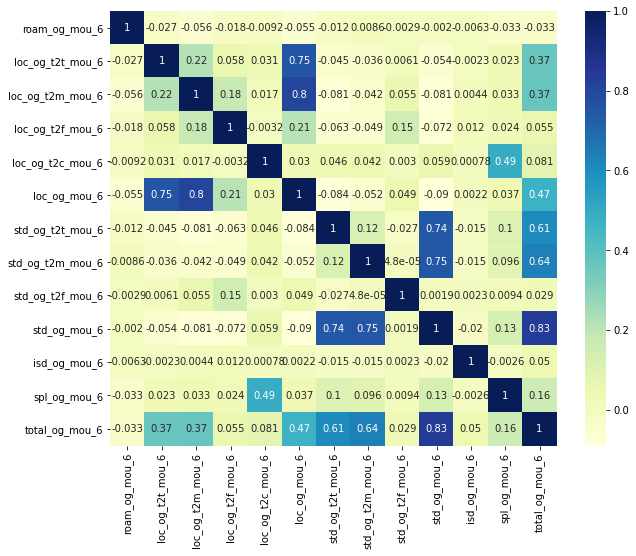

In [51]:
# Lets consider the outgoing calls usage of month 6

# Filtering the columns
mou_og_colsmonth6 = High_Value_Cust_df.columns[High_Value_Cust_df.columns.str.contains('.*_og_.*mou_6',regex=True)]
# extarcting the data
Month6_mou_outgoing =High_Value_Cust_df[mou_og_colsmonth6]

#Plot heat map to view the variablea are highly corelated
plt.figure(figsize = (10,8))
sns.heatmap(Month6_mou_outgoing.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Analysis:
- Columns " total_og_mou_6" ,"std_og_mous_6", "loc_og_mou_6","std_og_t2t_mous_6",std_og_t2f_mou_6","loc_og_t2t_mous_6",loc_og_t2f_mou_6" are highly correlated.

- And we need to check and avoid multicolinearity issues

In [52]:
# Check total outgoing calls are equivalent to the the other variables correlated
High_Value_Cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [53]:

# Checking the total with dependent variables for the month6
print ("sum of the variables represent outgoing mins of usage=")
print (  High_Value_Cust_df.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print("total present in the total_og_mou column=")
print(High_Value_Cust_df.loc[8,'total_og_mou_6'])
print("-----------------------------------------------------")
print ("sum of the variables represent the outgoing std based on operator=")
#print(High_Value_Cust_df.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print("total present in the std_og_mou column=")
print(High_Value_Cust_df.loc[8,'std_og_mou_6'])
print("-----------------------------------------------------")
print ("sum of the variables represent the outgoing local calls based on operator=")
#print(High_Value_Cust_df.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())
print("total present in the loc_og_mou column=")
print(High_Value_Cust_df.loc[8,'loc_og_mou_6'])

sum of the variables represent outgoing mins of usage=
508.34999999999997
total present in the total_og_mou column=
508.36
-----------------------------------------------------
sum of the variables represent the outgoing std based on operator=
total present in the std_og_mou column=
130.26
-----------------------------------------------------
sum of the variables represent the outgoing local calls based on operator=
total present in the loc_og_mou column=
378.09


From the above analysis ,We noted that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [54]:
#Removing the corelated variables from the dataset
# assign the cols to remove
cols=['total_og_mou_6','std_og_mou_6','loc_og_mou_6','total_og_mou_7','std_og_mou_7','loc_og_mou_7','total_og_mou_8','std_og_mou_8','loc_og_mou_8']
# Dropping the  columns
High_Value_Cust_df.drop(cols, inplace = True, axis = 1)

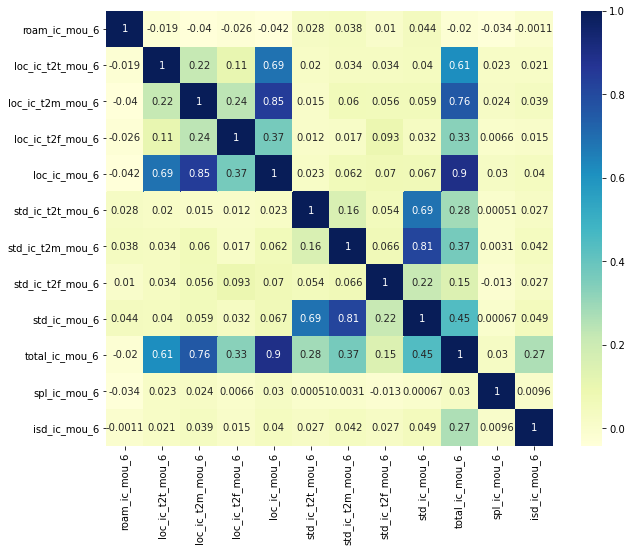

In [55]:
# Lets consider the incomming calls usage of month 6

# Filtering the columns
mou_ic_colsmonth6 = High_Value_Cust_df.columns[High_Value_Cust_df.columns.str.contains('.*_ic_.*mou_6',regex=True)]
# extarcting the data
Month6_mou_incoming =High_Value_Cust_df[mou_ic_colsmonth6]

#Plot heat map to view the variablea are highly corelated
plt.figure(figsize = (10,8))
sns.heatmap(Month6_mou_incoming.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Analysis:
- Columns " total_ic_mou_6" ,"std_ic_mous_6", "loc_ic_mou_6","std_ic_t2t_mous_6",std_ic_t2m_mou_6","loc_ic_t2t_mous_6",loc_og_t2m_mou_6" are highly correlated.

- And we need to check and avoid multicolinearity issues

In [56]:
# Checking the total with dependent variables for the month6
print ("sum of the variables represent incomming mins of usage=")
print (High_Value_Cust_df.loc[8,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print("total present in the total_ic_mou column=")
print(High_Value_Cust_df.loc[8,'total_ic_mou_6'])
print("----------------")
print ("sum of the variables represent the incomming local calls based on operator=")
#print(High_Value_Cust_df.loc[8,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print("total present in the loc_ic_mou column=")
print(High_Value_Cust_df.loc[8,'loc_ic_mou_6'])
print("----------------")
print ("sum of the variables represent the incomming std calls based on operator=")
#print(High_Value_Cust_df.loc[8,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())
print("total present in the std_ic_mou column=")
print(High_Value_Cust_df.loc[8,'std_ic_mou_6'])

sum of the variables represent incomming mins of usage=
103.86000000000001
total present in the total_ic_mou column=
103.86
----------------
sum of the variables represent the incomming local calls based on operator=
total present in the loc_ic_mou column=
81.43
----------------
sum of the variables represent the incomming std calls based on operator=
total present in the std_ic_mou column=
22.43


From the above analysis ,We noted that total_ic_mou_6, std_ic_mou_6 and loc_icg_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [57]:
#Removing the corelated variables from the dataset
# assign the cols to remove
cols=['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']
# Dropping the  columns
High_Value_Cust_df.drop(cols, inplace = True, axis = 1)


##### Analysis on AON -Age on network - number of days the customer is using the operator T network

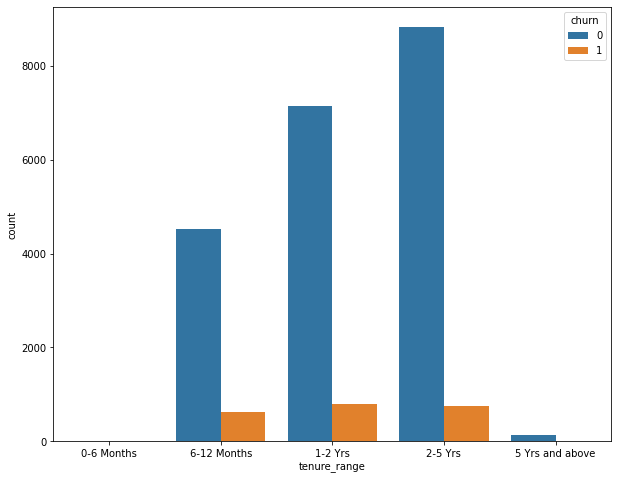

In [58]:
# Lets consider the column AON
#tenure analysis
#copying the data set
tenure=High_Value_Cust_df.copy()
# dreiving a feature tenure
tenure['tenure'] = tenure['aon']/30

plt.figure(figsize=(10,8))
#setting the range in months
tn_range = [0, 6, 12, 24, 60, 61]
# labelling the months
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure['tenure_range'] = pd.cut(tenure['tenure'], tn_range, labels=tn_label)
tenure['tenure_range'].head()
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure)
plt.show()


From the above analysis customers tendency to churn is after 6 months

In [59]:
High_Value_Cust_df.shape #checking the dimension

(29953, 132)

## Feature Enginerring

#####  Derive new features

In [60]:
#Creating a copy of the dataframe
HV_df = High_Value_Cust_df.copy()

In [61]:
#Finding the shape of the data
HV_df.shape

(29953, 132)

In [62]:
#Finding the unique columns that have the same name(befor the suffix) for 6th and 7th month
col_list = HV_df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num',
       'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'date_of_last_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'vol_2g_mb', 'vol_3g_mb',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'vbc_3g', 'total_rech_amt_data'],
      dtype='object')

In [63]:
#Finding the average of good phase columns i.e. 6th and 7th month columns
for col in (col_list.unique()):
    avg_col_name = "avg_"+col+"_67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    HV_df[avg_col_name] = (HV_df[col_6]  + HV_df[col_7])/ 2

In [64]:
#finding the shape of the df
HV_df.shape

(29953, 175)

In [65]:
#Dropping the columns with the suffix _6 and 7
cols_to_drop= HV_df.filter(regex='_6$|_7$').columns
len(cols_to_drop)
HV_df.drop(cols_to_drop, axis=1, inplace=True)

In [66]:
HV_df.shape #checking the dimension

(29953, 89)

### Outliers

In [67]:
#Function to show outlier graph for all the columns

def outliersPlot():
    columnList = (list(HV_df.columns[:]))
    columnList.remove('churn')
    for count, eachColumn in enumerate(columnList):
        if(count%2 == 0):
            plt.figure(count, figsize=(18,6))
            p = plt.subplot(121)
            sns.boxplot(y = HV_df[eachColumn], x = HV_df['churn'])
            p.set_xticklabels(['Not-Churn','churn'], fontsize= 12)
            p.grid(True)
        else:
            q = plt.subplot(122)
            sns.boxplot(y = HV_df[eachColumn], x = HV_df['churn'])
            q.set_xticklabels(['Not-Churn','churn'], fontsize= 12)
            q.grid(True)

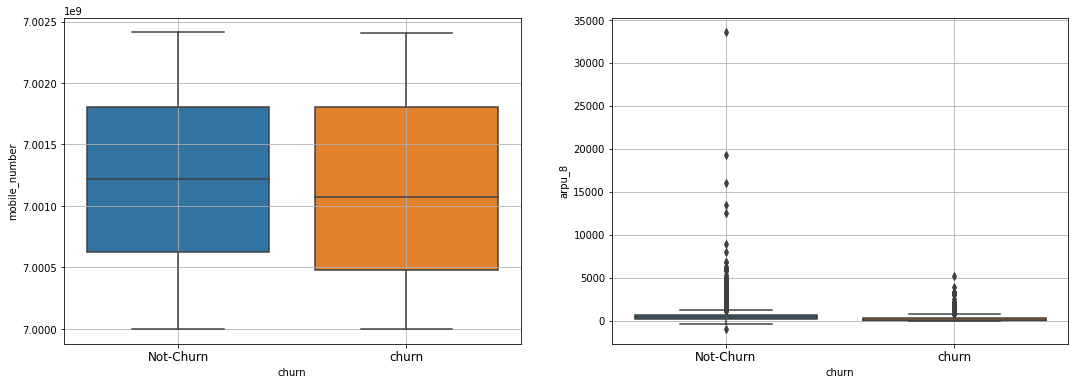

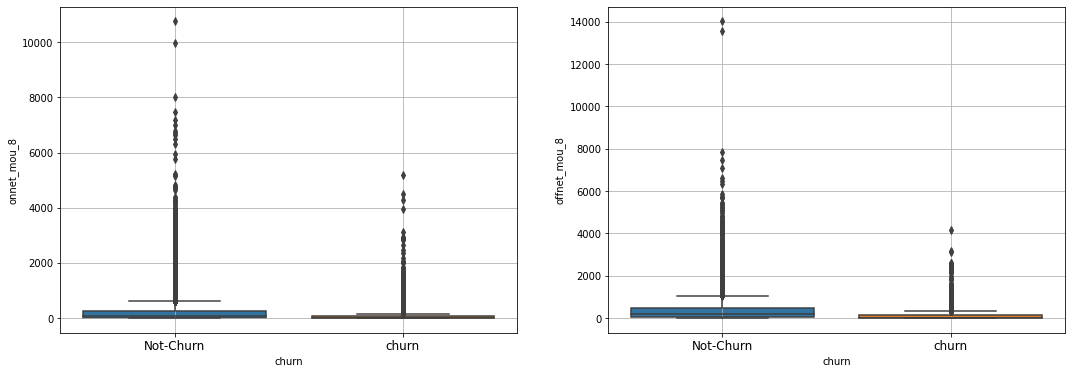

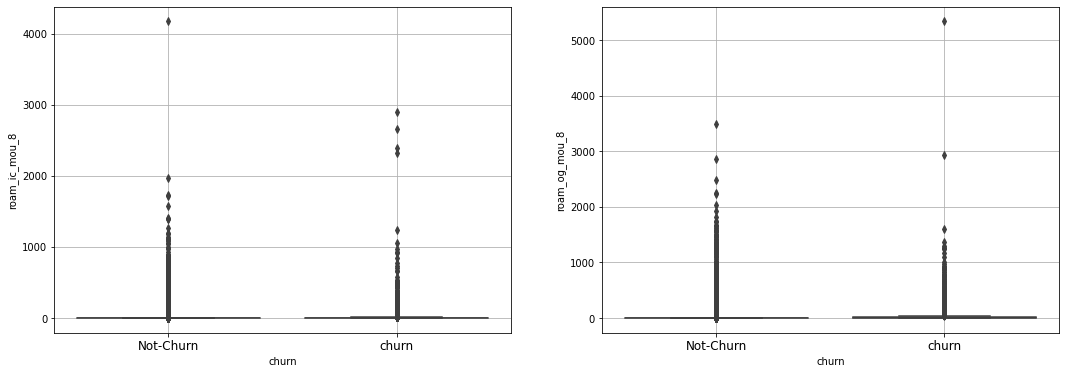

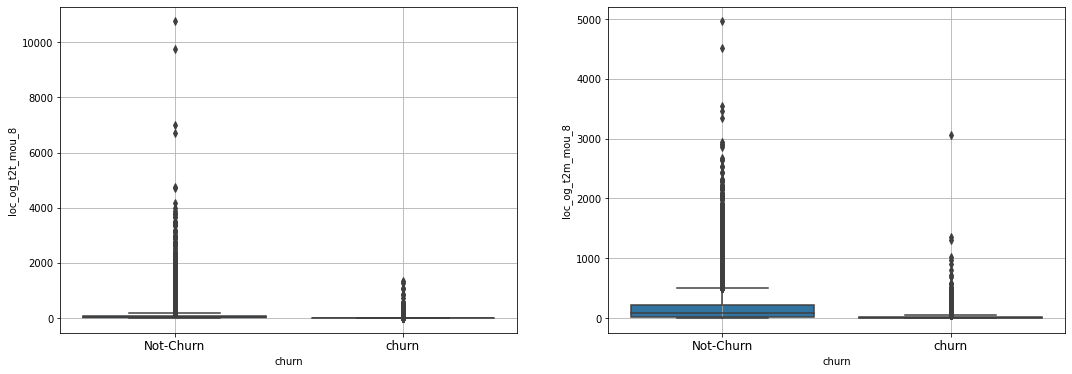

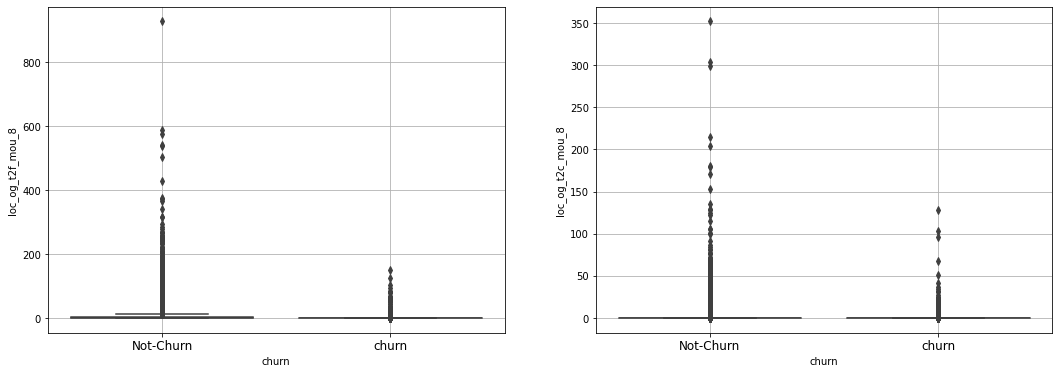

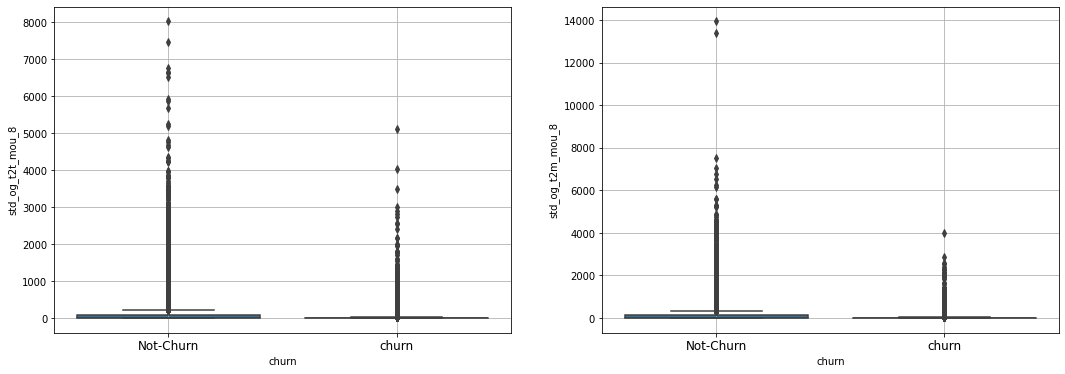

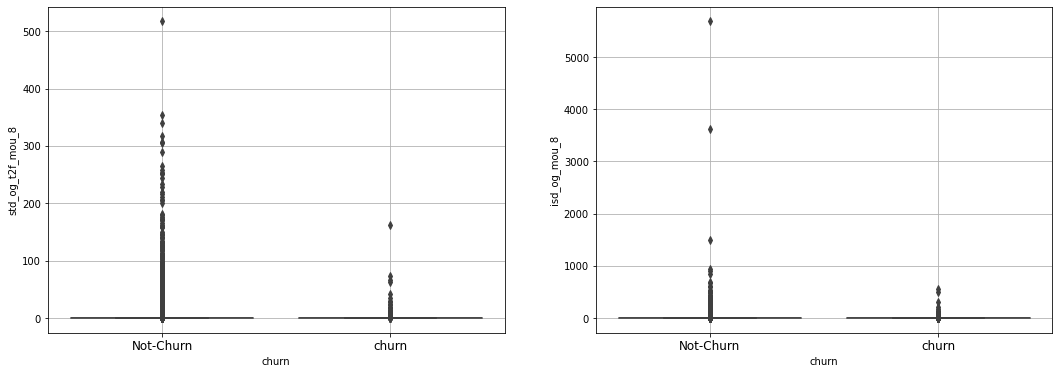

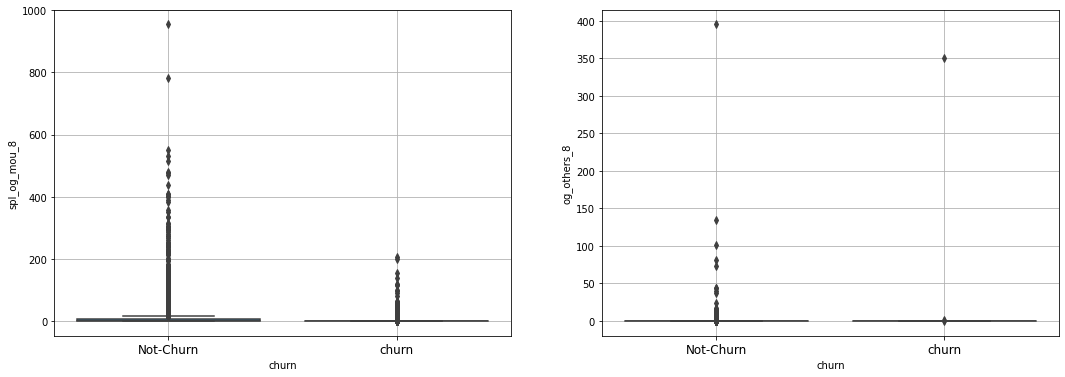

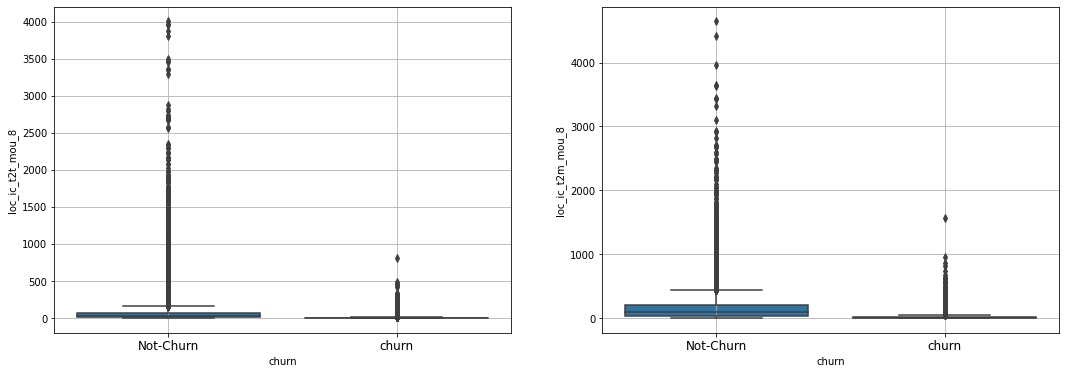

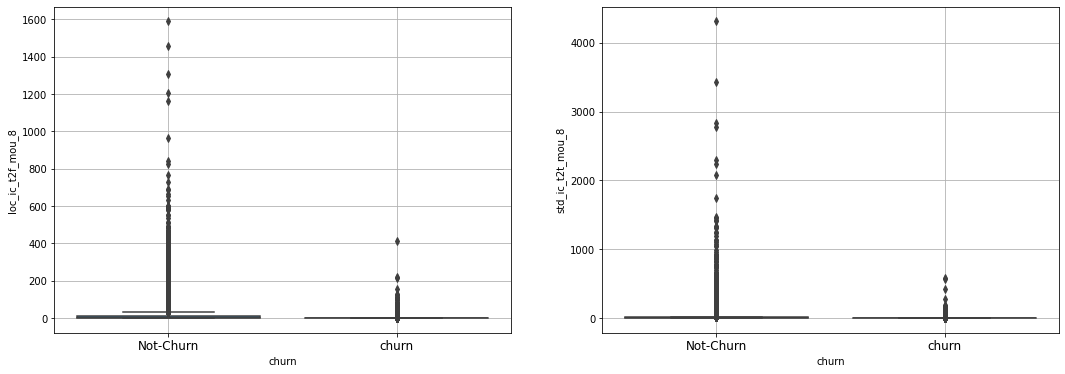

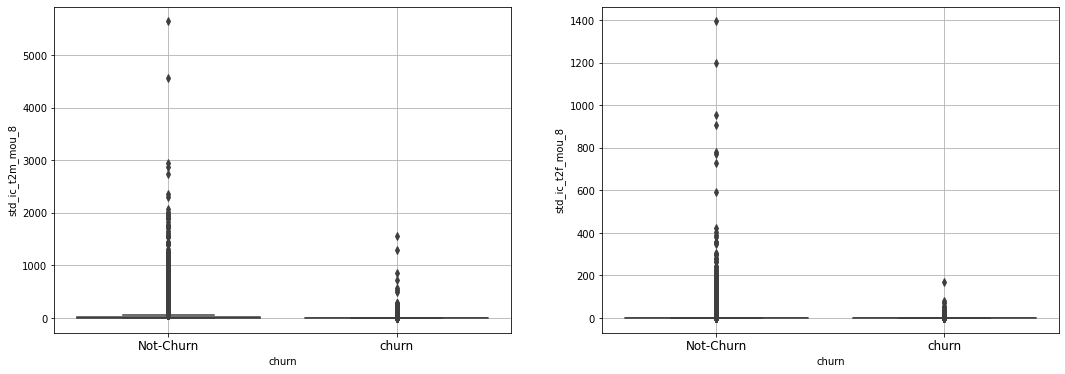

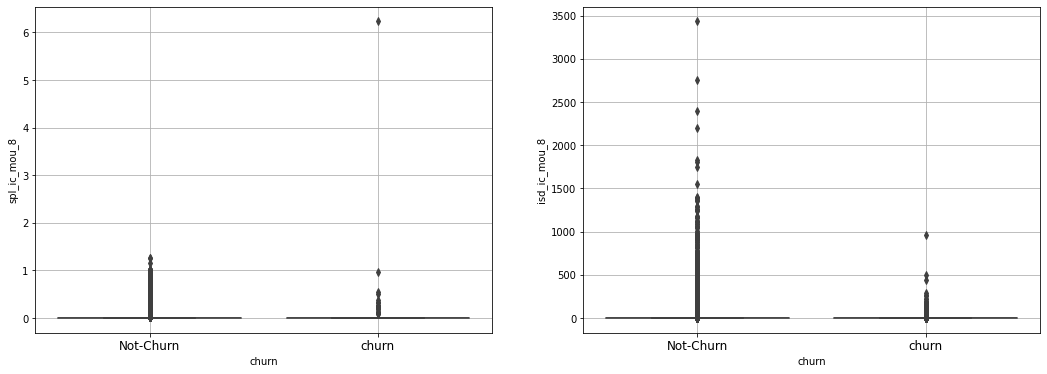

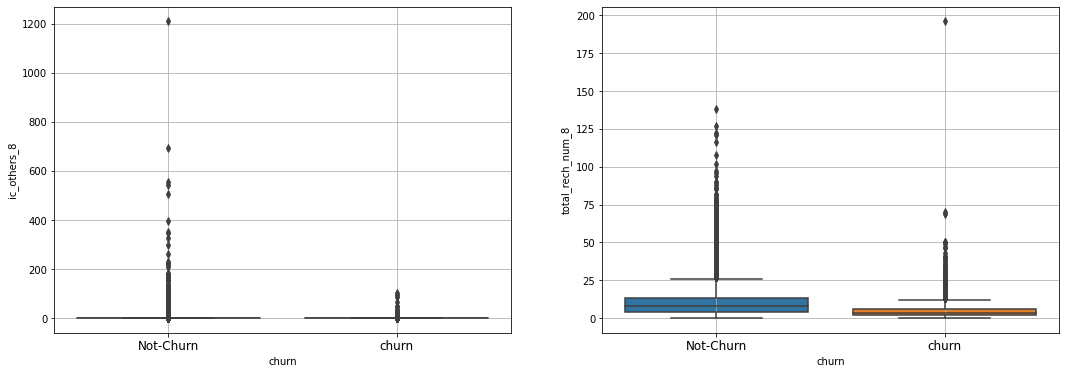

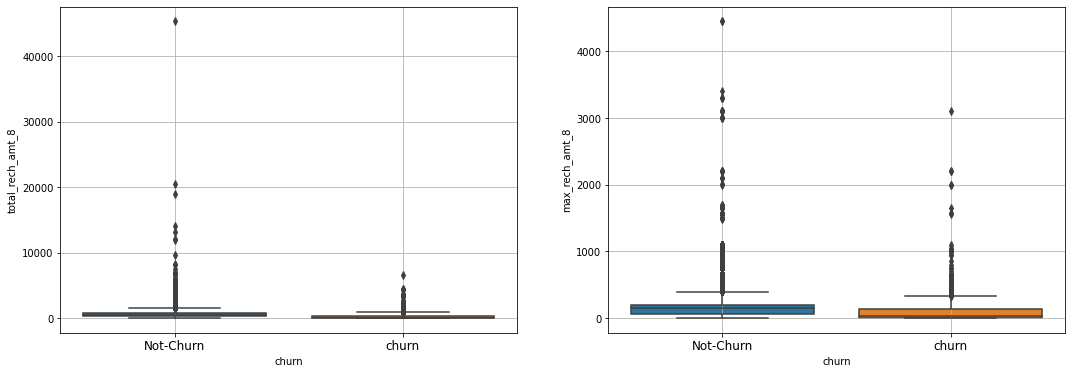

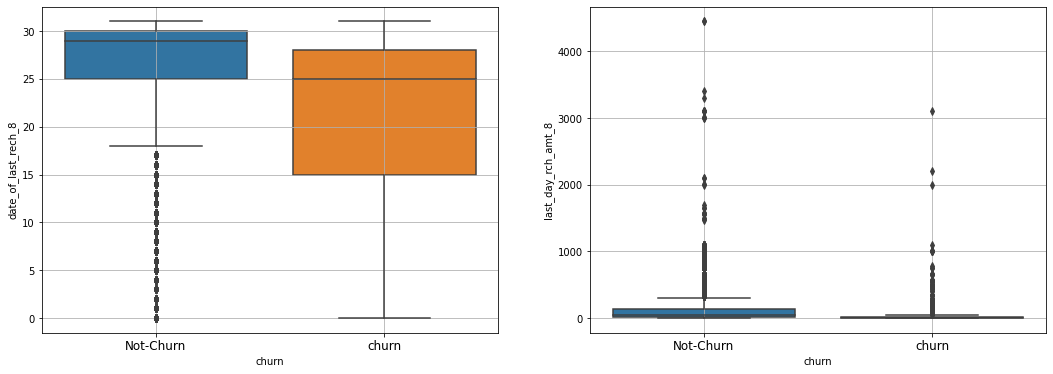

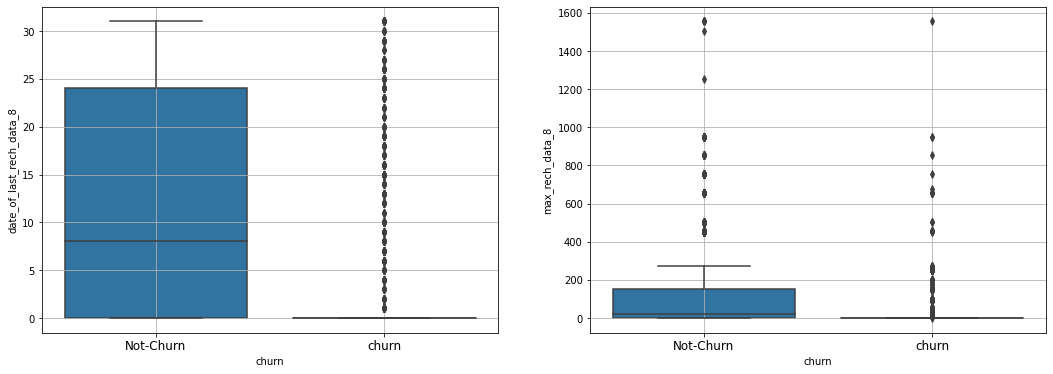

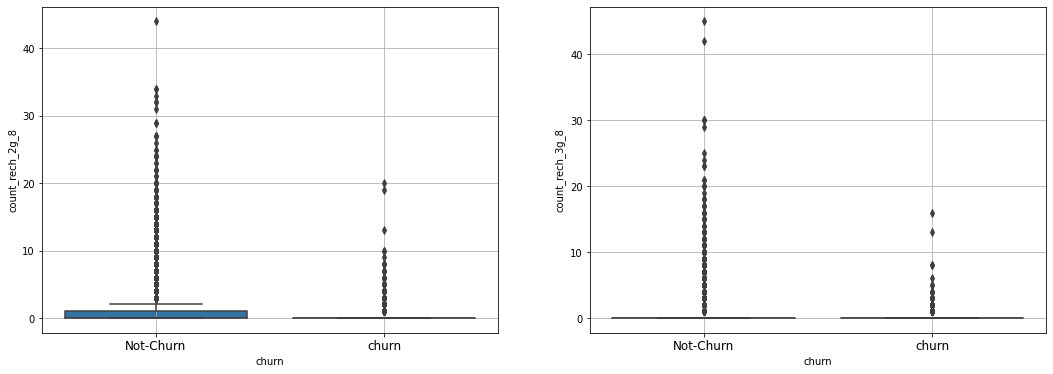

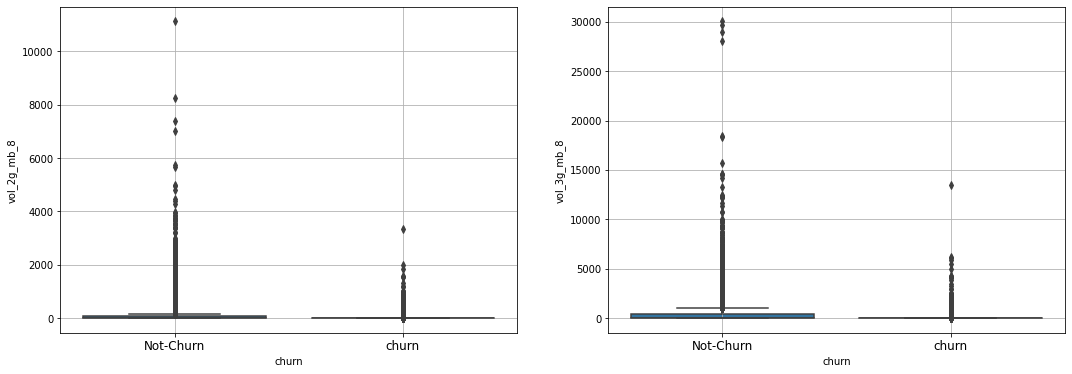

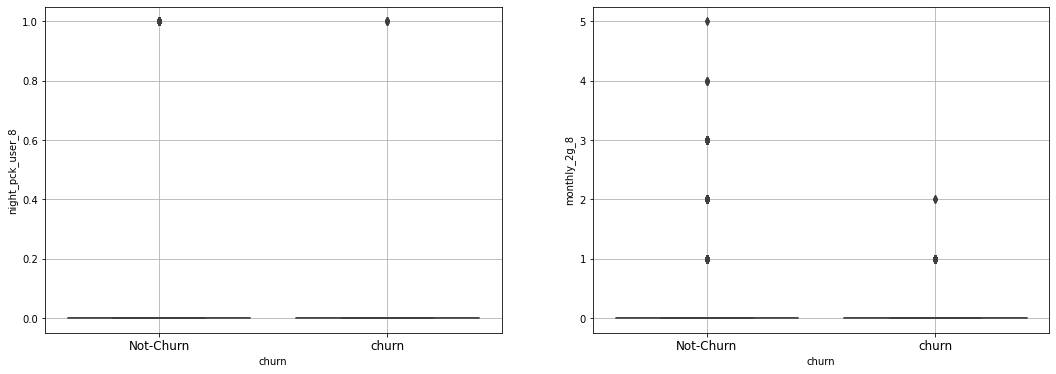

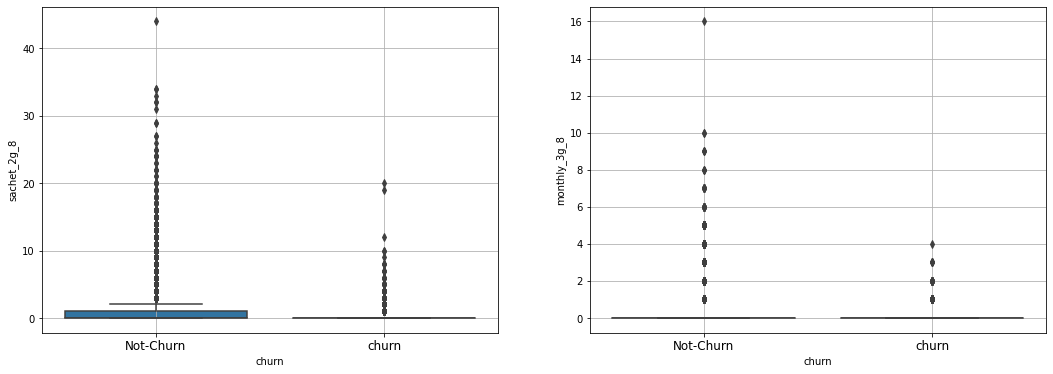

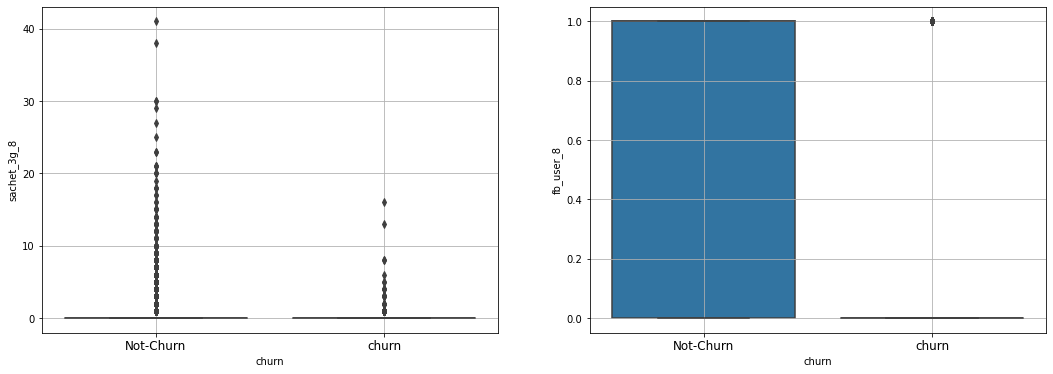

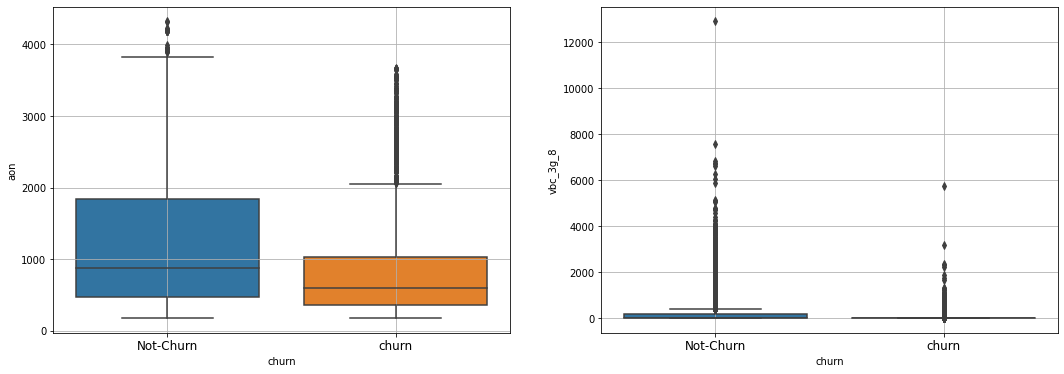

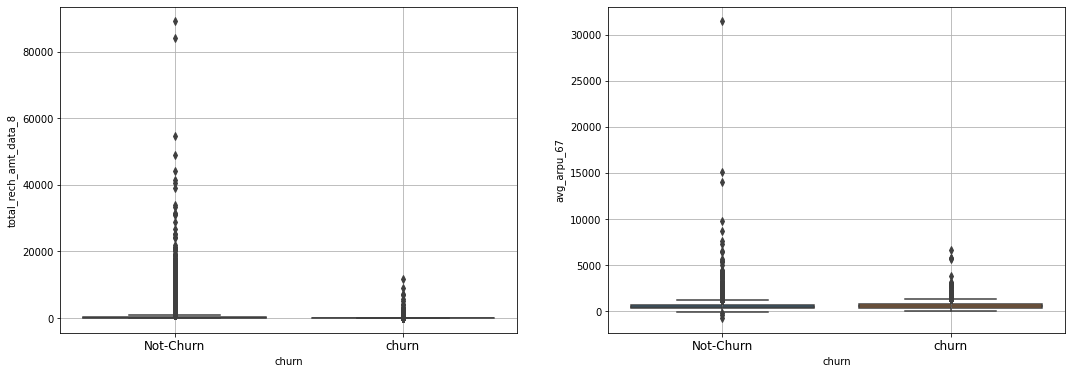

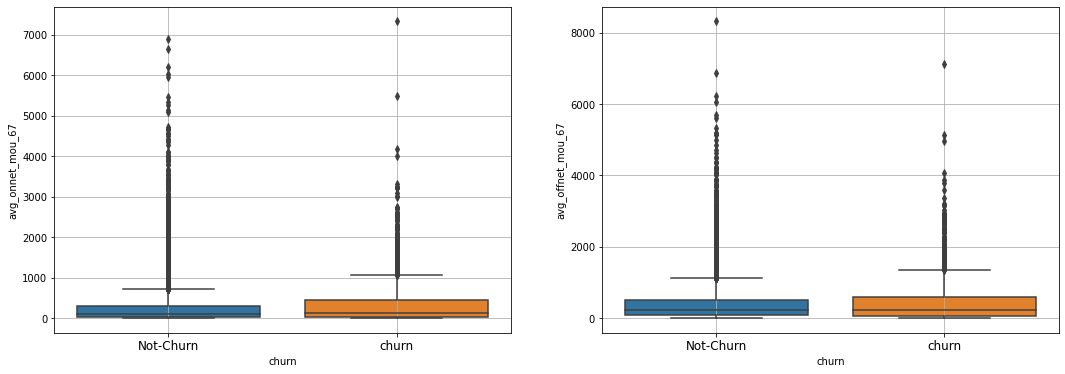

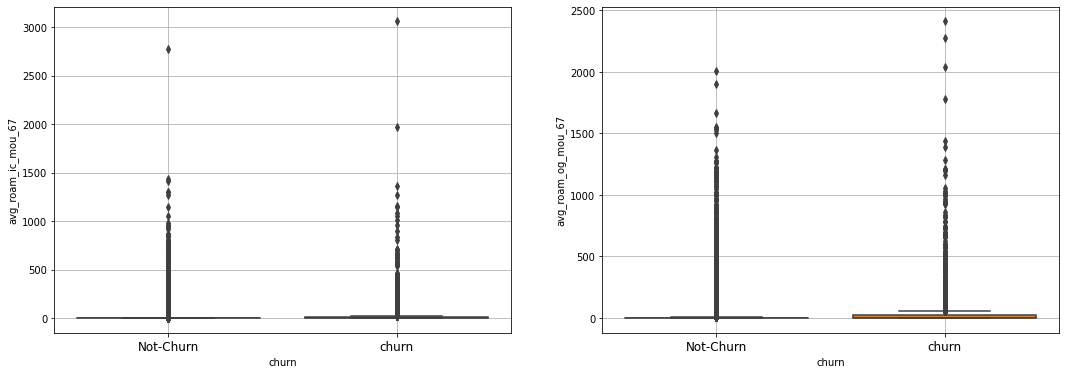

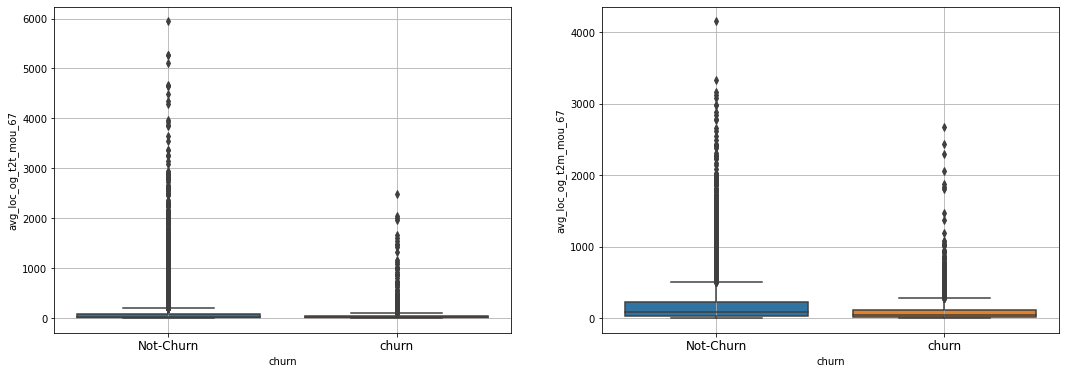

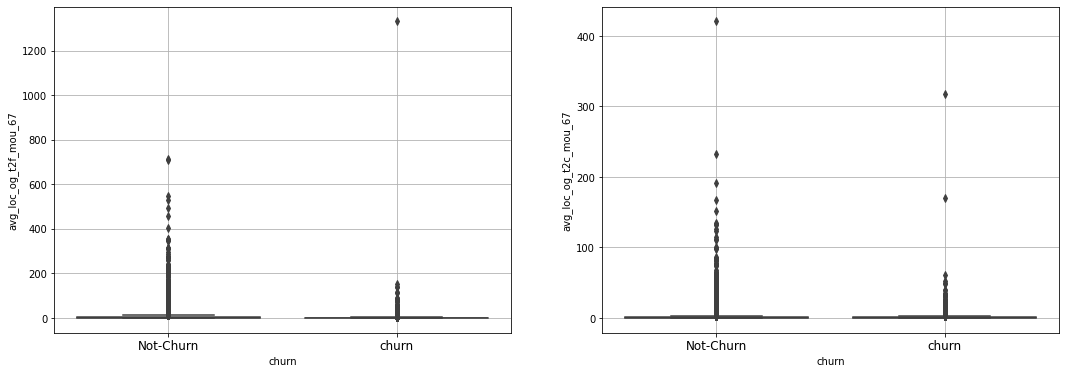

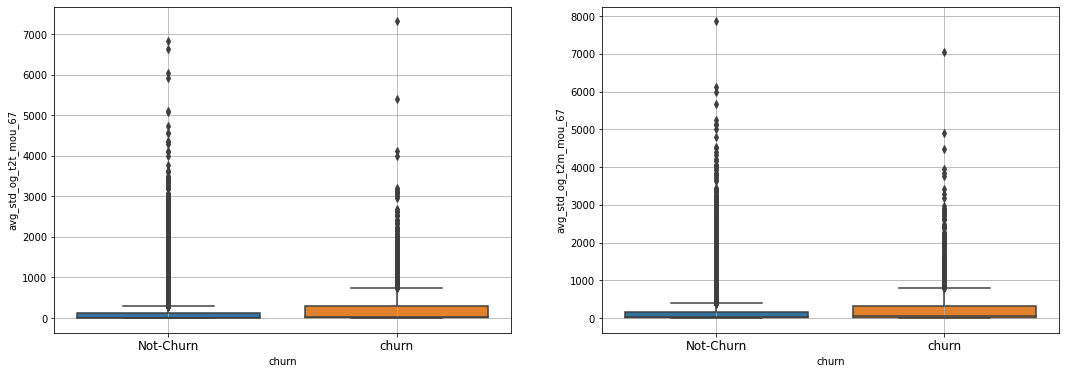

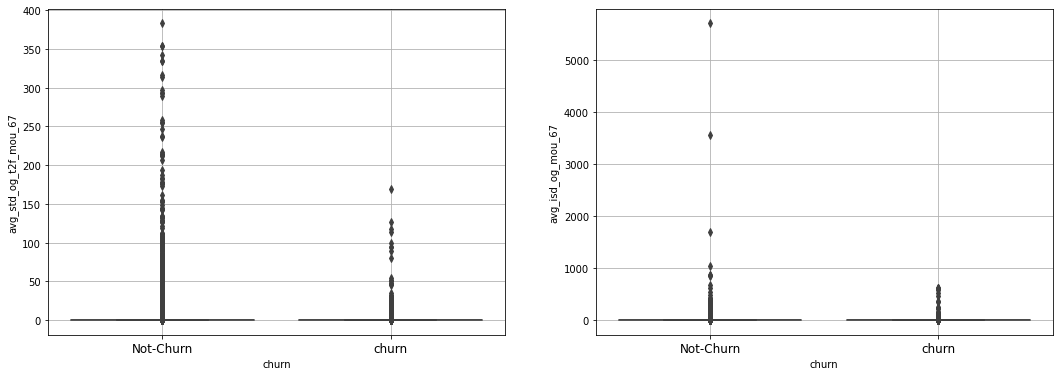

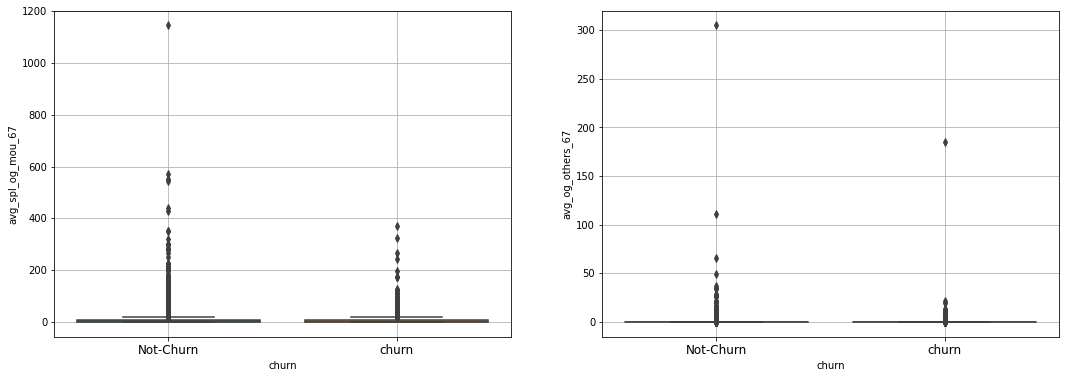

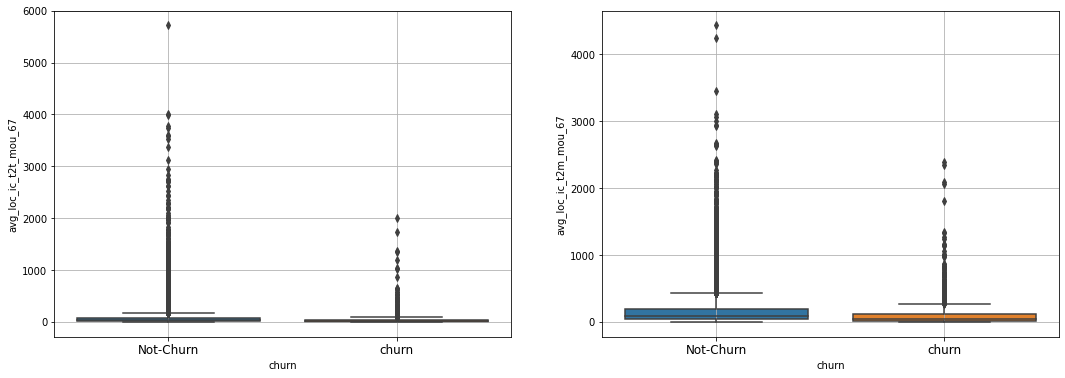

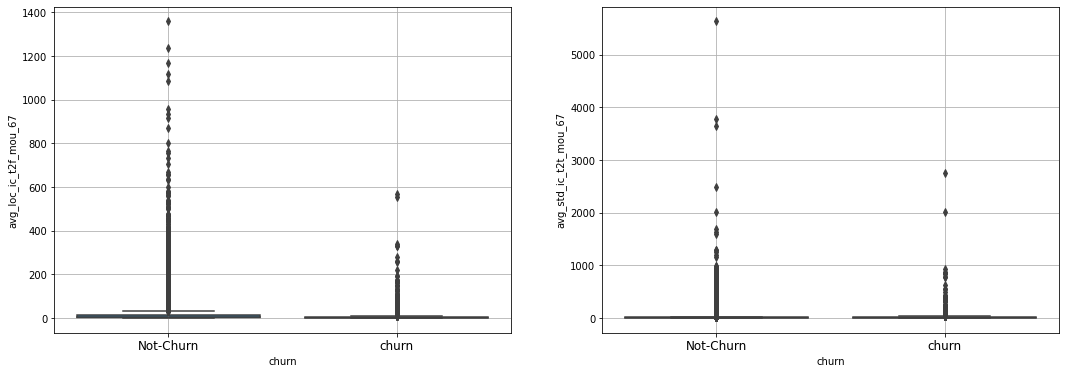

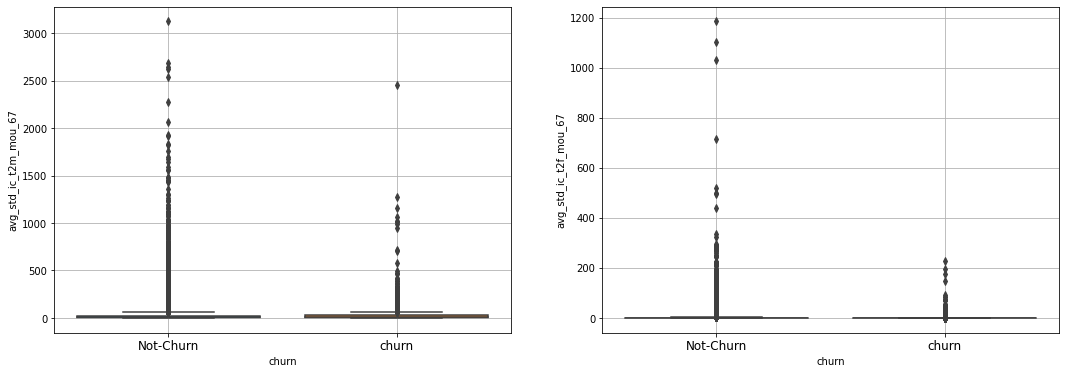

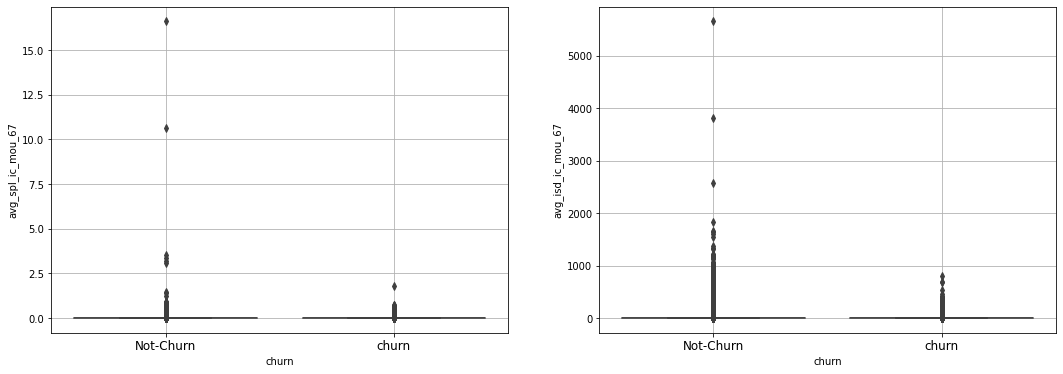

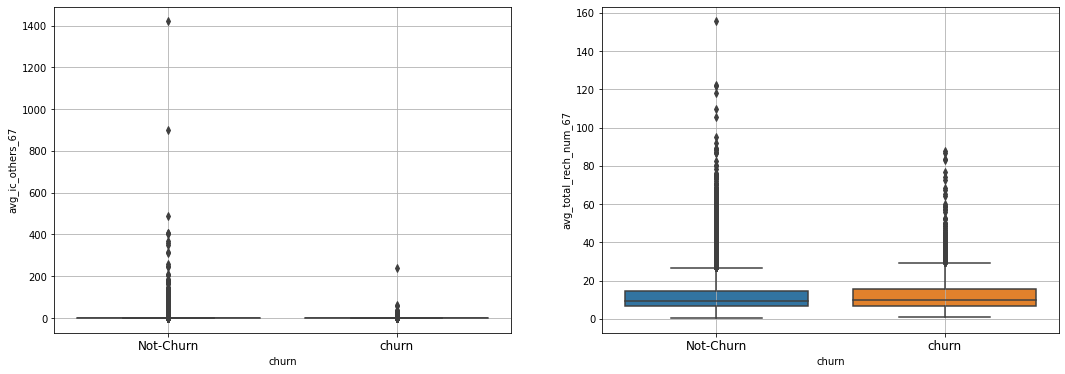

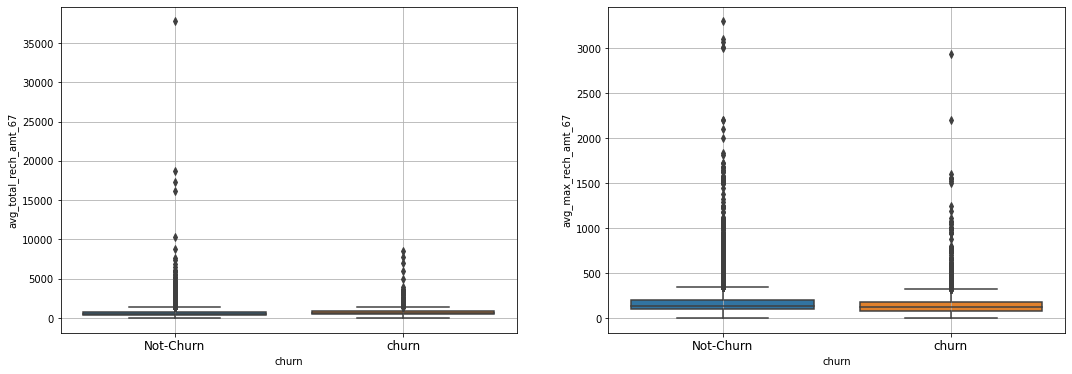

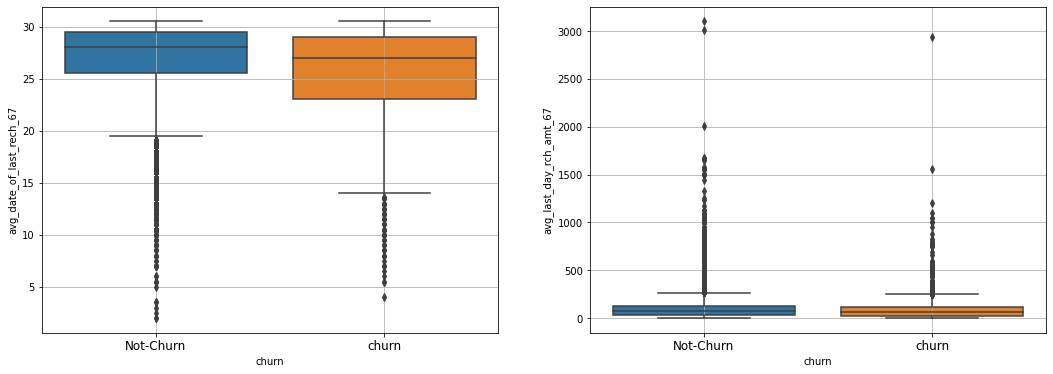

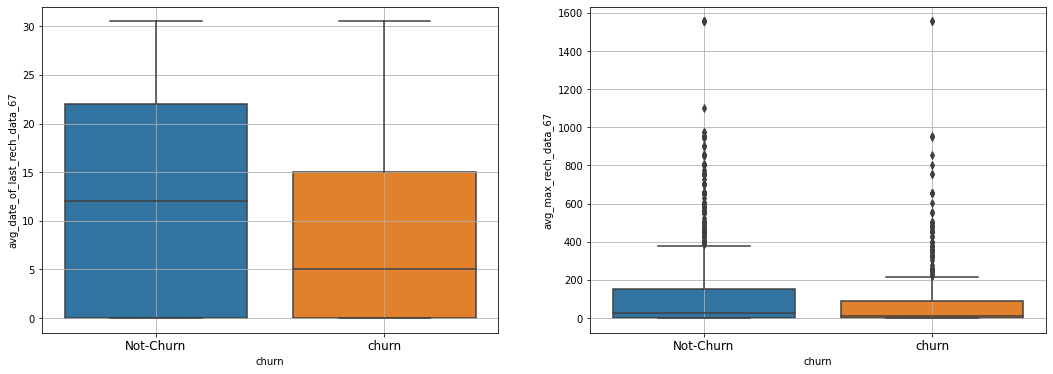

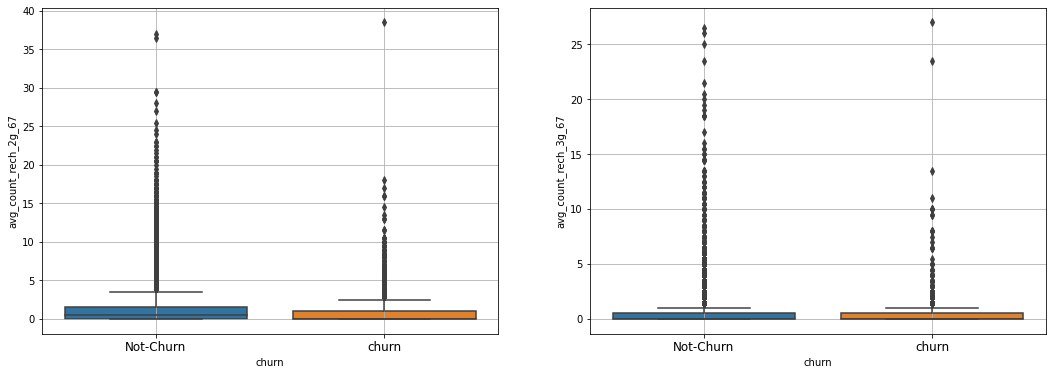

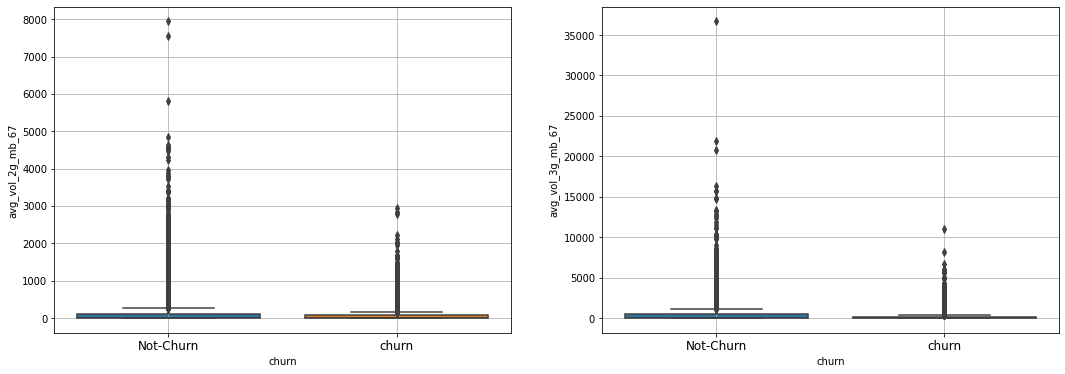

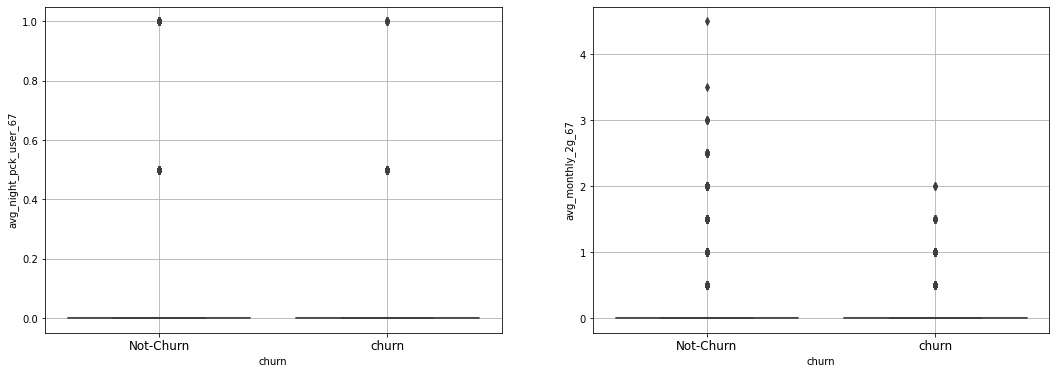

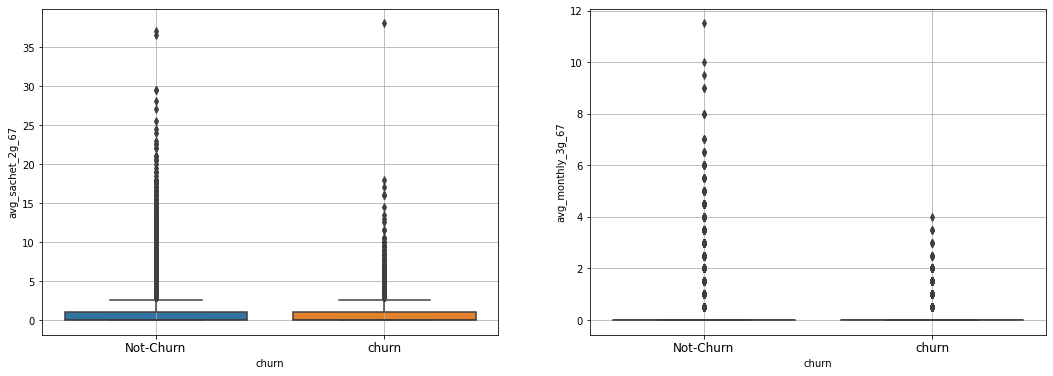

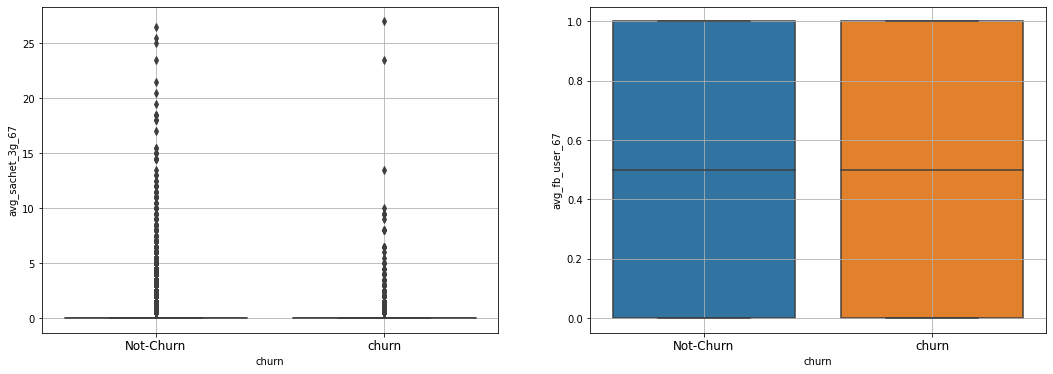

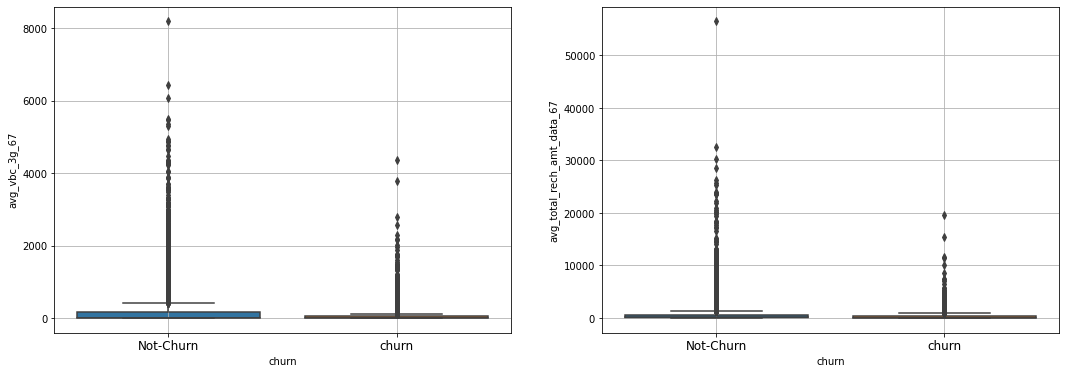

In [68]:
outliersPlot()#ploting the graph

In [69]:
# Assigning Quantiles
Q1 = HV_df.quantile(0.05)
Q3 = HV_df.quantile(0.99)
IQR = Q3 - Q1

In [70]:
#Removing the outliers the orginal data set
HV_df = HV_df[~((HV_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
HV_df.shape #Checking the shape of the dataframe

(28047, 89)

# 4.Modelling

In [72]:
#Creating copy of dataframe
df_modelling_data = HV_df[:].copy()

In [73]:
#Dropping Mobile Numer
df_modelling_data.drop('mobile_number', axis=1, inplace=True)

In [74]:
df_modelling_data.shape

(28047, 88)

#### Scaling the data (Using StandardScaler)

In [75]:
X= df_modelling_data.drop(['churn'], axis=1)
y= df_modelling_data['churn']

In [76]:
df_modelling_data.drop('churn', axis=1, inplace=True)

In [77]:
#Importing required libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [78]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Splitting the datasets in train-test sets

In [79]:
#Importing the required library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [80]:
#Checking the shape of train and test data
print("Shape of training dataset: ", len(X_train))
print("Shape of test dataset: ", len(X_test))

Shape of training dataset:  19632
Shape of test dataset:  8415


#### Data Imbalance and Balancing the data in the traiing dataset (Using SMOTE)

In [81]:
#Checking the chrun and non-churn customers in the training dataset
print("Training Dataset")
print("_"*27)
print('Non-Churn customers: ',sum(y_train==0) )
print('Churn customers: ',sum(y_train==1) )


Training Dataset
___________________________
Non-Churn customers:  17996
Churn customers:  1636


In [82]:
# Printing the count of churn and non-churn customers
y_train.value_counts()

0    17996
1     1636
Name: churn, dtype: int64

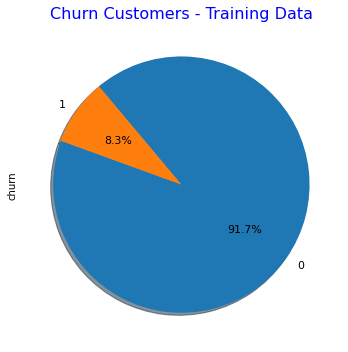

In [83]:
#Plotting the pie chart for the Churn data
fig = plt.figure(figsize=(5,5))
y_train.value_counts().plot.pie(fontsize=11, autopct='%1.1f%%', shadow=True, startangle=160)
plt.title('Churn Customers - Training Data',color="b",fontdict={"fontsize": 16})
plt.tight_layout()
 
plt.show()

###### distribution:
- 8.3% - total churn customers
- 91.7% - non-churn customers.

Hence data is highly imbalance.

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:

smote=SMOTE(random_state=100)

X_train_bal, y_train_bal= smote.fit_resample(X_train, y_train)

In [86]:
#Checking the shape of the balanced dataset
print("Shape of X_train_bal: ", X_train_bal.shape)
print("Shape of y_train_bal: ", y_train_bal.shape)


Shape of X_train_bal:  (35992, 87)
Shape of y_train_bal:  (35992,)



## 4.1: Basic Logistic Regression

In [87]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [88]:
lr = LogisticRegression()

#Fitting LR
lr.fit(X_train, y_train)

#Making predictions
y_pred = lr.predict(X_test)

##### Confusion Matrix:

In [89]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7619  131]
 [ 442  223]]


In [90]:
print("Basic Logistic Regression")
print("="*36)
print("Accuracy:\t",accuracy_score(y_test,y_pred))
print("Precision:\t", precision_score(y_test, y_pred, average="macro"))
print("Recall:\t\t",recall_score(y_test, y_pred, average="macro"))
print("ROC AUC:\t", roc_auc_score(y_test, y_pred))

Basic Logistic Regression
Accuracy:	 0.9319073083778966
Precision:	 0.7875557980567663
Recall:		 0.659217560029105
ROC AUC:	 0.659217560029105


### Principal Component Analysis

In [91]:
#Improting the required libraries
from sklearn.decomposition import PCA


pca = PCA(random_state=100)

In [92]:
#Performing PCA on the balanced training dataset
X_train_pca = pca.fit_transform(X_train_bal)
#printing shape of training data set on which PCA is applied
print("Shape of X_train_pca: ",X_train_pca.shape)


#Performing PCA on the test dataset
X_test_pca = pca.transform(X_test)
#printing shape of test data set on which PCA is applied
print("Shape of X_test_pca: ",X_test_pca.shape)

Shape of X_train_pca:  (35992, 87)
Shape of X_test_pca:  (8415, 87)


In [93]:
#Checking the variance ratios of individual feature
pca.explained_variance_ratio_

array([1.10865240e-01, 9.83719324e-02, 6.67960816e-02, 5.22333769e-02,
       4.32643480e-02, 3.97542178e-02, 3.21122094e-02, 3.04600431e-02,
       2.55958876e-02, 2.39454073e-02, 2.18696620e-02, 2.10454010e-02,
       1.83362236e-02, 1.77418880e-02, 1.74485751e-02, 1.66521121e-02,
       1.65040125e-02, 1.57270132e-02, 1.47800428e-02, 1.37270765e-02,
       1.33929079e-02, 1.26999669e-02, 1.22616176e-02, 1.11897138e-02,
       1.09845705e-02, 1.05596278e-02, 1.02582411e-02, 9.74272136e-03,
       9.49785348e-03, 9.29086079e-03, 8.95107171e-03, 8.70332474e-03,
       8.15212639e-03, 7.99184540e-03, 7.74163274e-03, 7.58622992e-03,
       7.51285680e-03, 7.24388772e-03, 7.11258848e-03, 6.92709312e-03,
       6.70255771e-03, 5.96809031e-03, 5.81697617e-03, 5.65933900e-03,
       5.54591340e-03, 5.24566238e-03, 5.18147353e-03, 4.62398190e-03,
       4.56615523e-03, 4.49613614e-03, 4.19527173e-03, 3.95638304e-03,
       3.66720853e-03, 3.62836610e-03, 3.55220812e-03, 3.27410168e-03,
      

#### Scree plot for finding the number of components for dimensional reduction:

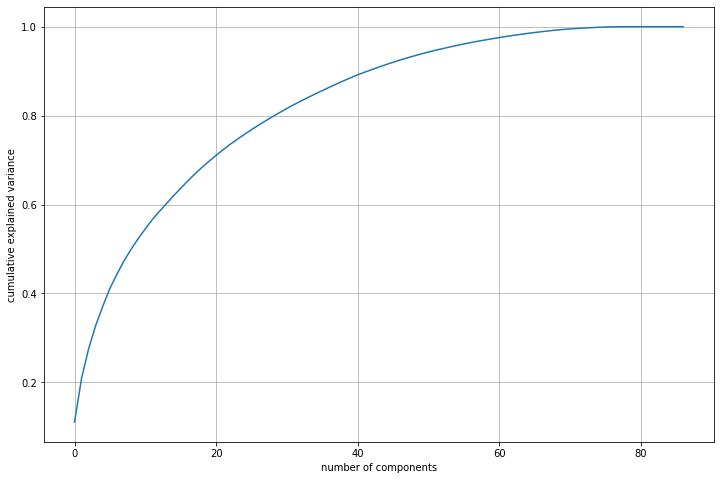

In [94]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [95]:
#Checking the cumulative variance ratio
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

array([ 11.087,  20.924,  27.604,  32.827,  37.153,  41.128,  44.339,
        47.385,  49.945,  52.34 ,  54.527,  56.632,  58.466,  60.24 ,
        61.985,  63.65 ,  65.3  ,  66.873,  68.351,  69.724,  71.063,
        72.333,  73.559,  74.678,  75.776,  76.832,  77.858,  78.832,
        79.782,  80.711,  81.606,  82.476,  83.291,  84.09 ,  84.864,
        85.623,  86.374,  87.098,  87.809,  88.502,  89.172,  89.769,
        90.351,  90.917,  91.472,  91.997,  92.515,  92.977,  93.434,
        93.884,  94.304,  94.7  ,  95.067,  95.43 ,  95.785,  96.112,
        96.427,  96.735,  97.014,  97.292,  97.551,  97.809,  98.045,
        98.27 ,  98.489,  98.688,  98.877,  99.058,  99.232,  99.375,
        99.506,  99.606,  99.698,  99.784,  99.867,  99.923,  99.963,
        99.993,  99.998, 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   , 100.   ])

Note:
- It is clear that 56 components cumulatively shows 96% of the variance
- So we'll go ahead with 56 components for dimentionality reduction

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [96]:
len(HV_df.columns)

89

In [97]:
len(pca.components_[1])

87

In [98]:
pca.components_[0]

array([ 9.37669883e-02,  1.35573721e-01,  1.25721977e-01,  7.50602814e-02,
        1.07204659e-01,  3.93563690e-02,  4.01491278e-02,  4.05398692e-03,
        1.17738299e-02,  1.22211955e-01,  1.11922397e-01,  1.65848700e-03,
        3.40988961e-03,  2.41728608e-02,  2.48154184e-24,  1.46987800e-02,
        6.46537179e-03, -1.39556097e-02,  3.05887492e-02,  2.93978586e-02,
       -6.39125868e-03,  6.08609457e-03,  2.45951404e-03,  7.76536053e-03,
        6.30361289e-02,  8.66974303e-02, -1.27621704e-02,  4.74245116e-02,
       -5.22118621e-03, -1.59813343e-01, -1.58703420e-01, -1.05006178e-01,
       -1.27081982e-01, -8.27521701e-02, -1.32948658e-01, -2.60950790e-02,
       -6.94119261e-02, -9.34382254e-02, -1.05071458e-01, -7.87055683e-02,
       -2.04337608e-01, -3.58972793e-03, -1.07342480e-01, -1.27380513e-01,
        1.87634691e-01,  2.08398288e-01,  2.11064009e-01,  6.75402373e-02,
        1.02050027e-01,  5.51438860e-02,  6.12968602e-02,  4.94365852e-03,
        1.11420938e-02,  

In [99]:
#Understanding how the variables are loaded on the principal components. It can be verified from above as well.
colnames = list(df_modelling_data.columns)
df_pcs = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
df_pcs

,Feature,PC1,PC2
0,arpu_8,9.376699e-02,0.308959
1,onnet_mou_8,1.355737e-01,0.111287
2,offnet_mou_8,1.257220e-01,0.173006
3,roam_ic_mou_8,7.506028e-02,0.052094
4,roam_og_mou_8,1.072047e-01,0.065042
5,loc_og_t2t_mou_8,3.935637e-02,0.115921
6,loc_og_t2m_mou_8,4.014913e-02,0.171267
7,loc_og_t2f_mou_8,4.053987e-03,0.109599
8,loc_og_t2c_mou_8,1.177383e-02,0.047539
9,std_og_t2t_mou_8,1.222120e-01,0.067350


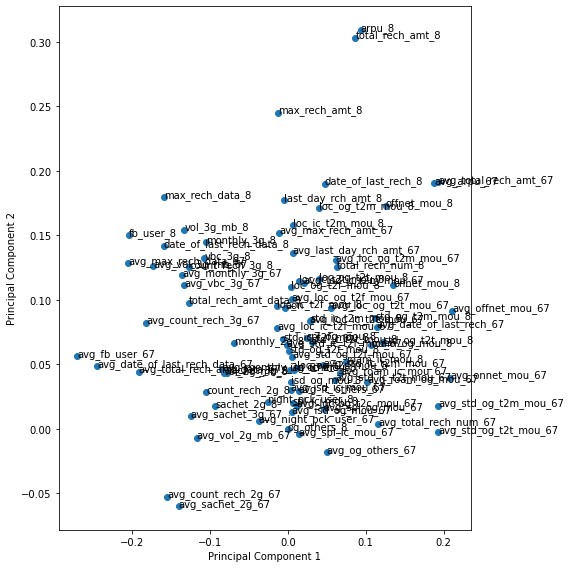

In [100]:
# plotting them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pcs.PC1, df_pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pcs.Feature):
    plt.annotate(txt, (df_pcs.PC1[i],df_pcs.PC2[i]))
plt.tight_layout()
plt.show()

In [101]:
#Finally let's go ahead and do dimenstionality reduction using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=56)

In [102]:
df_train_pca_56 = pca_final.fit_transform(X_train_bal)
print('Shape of df_train_pca_56: ',df_train_pca_56.shape)

df_test_pca_56 = pca_final.transform(X_test)
print('Shape of df_test_pca_56: ',df_test_pca_56.shape)

Shape of df_train_pca_56:  (35992, 56)
Shape of df_test_pca_56:  (8415, 56)


## 4.2: Logistic Regression with PCA on Balanced Dataset

In [103]:
lr = LogisticRegression(C=1e9)
lr.fit(df_train_pca_56, y_train_bal)

# Predicted probabilities
y_pred = lr.predict(df_test_pca_56)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred)

#### Confusion Matrix

In [104]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6528 1222]
 [ 121  544]]


In [105]:
print("Logistic Regression with PCA")
print("="*36)
print("Accuracy:\t",accuracy_score(y_test,y_pred))
print("Precision:\t", precision_score(y_test, y_pred, average="macro"))
print("Recall:\t\t",recall_score(y_test, y_pred, average="macro"))
print("ROC AUC:\t", roc_auc_score(y_test, y_pred))

Logistic Regression with PCA
Accuracy:	 0.8404040404040404
Precision:	 0.644921272402444
Recall:		 0.830183846713558
ROC AUC:	 0.8301838467135582



## 4.3: Logistic regression with PCA and hyperparameter tuning

In [106]:
lr = LogisticRegression()

In [107]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [108]:
# Create grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV   
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

In [109]:
# Fit grid search
best_model = clf.fit(df_train_pca_56, y_train_bal)

In [110]:
y_perd=best_model.predict(df_test_pca_56)

In [111]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6528 1222]
 [ 121  544]]


In [112]:
print("Logistic Regression with Hyperparameter Tuning")
print("="*36)
print("Accuracy:\t",accuracy_score(y_test,y_pred))
print("Precision:\t", precision_score(y_test, y_pred, average="macro"))
print("Recall:\t\t",recall_score(y_test, y_pred, average="macro"))
print("ROC AUC:\t", roc_auc_score(y_test, y_pred))

Logistic Regression with Hyperparameter Tuning
Accuracy:	 0.8404040404040404
Precision:	 0.644921272402444
Recall:		 0.830183846713558
ROC AUC:	 0.8301838467135582


## 4.4: Random Forest Using default parameters

In [113]:
#Importing required libraries
from sklearn.ensemble import RandomForestClassifier

In [114]:
# Running the random forest with default parameters.S
rfc = RandomForestClassifier()

#Fitting the model
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier()

In [115]:
# Making predictions
y_pred = rfc.predict(X_test)


In [116]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7750
           1       0.61      0.67      0.63       665

    accuracy                           0.94      8415
   macro avg       0.79      0.81      0.80      8415
weighted avg       0.94      0.94      0.94      8415



In [117]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7461  289]
 [ 222  443]]


In [118]:
print("Random forest using default parameter")
print("="*56)
print("Accuracy:\t",accuracy_score(y_test,y_pred))
print("Precision:\t", precision_score(y_test, y_pred, average="macro"))
print("Recall:\t\t",recall_score(y_test, y_pred, average="macro"))
print("ROC AUC:\t", roc_auc_score(y_test, y_pred))

Random forest using default parameter
Accuracy:	 0.9392751039809863
Precision:	 0.7881481469627429
Recall:		 0.8144375454765947
ROC AUC:	 0.8144375454765949


## 4.5: Random Forest with Hyperparameter Tuning


### Hyperparameter Tuning

##### Tuning max_depth

In [119]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.937286,0.046767,0.021851,0.003635,2,{'max_depth': 2},0.938375,0.933028,0.935558,0.936831,...,0.936227,0.001839,4,0.938109,0.937408,0.938049,0.932765,0.937858,0.936838,0.002051
1,2.871176,0.056822,0.032111,0.001861,7,{'max_depth': 7},0.941940,0.936847,0.942435,0.942690,...,0.940964,0.002147,3,0.947660,0.948870,0.947727,0.946772,0.947154,0.947637,0.000709
2,3.796141,0.145729,0.033840,0.000398,12,{'max_depth': 12},0.940922,0.937102,0.943199,0.944218,...,0.941219,0.002461,2,0.976377,0.977714,0.977970,0.975869,0.975678,0.976722,0.000946
3,4.697552,0.122372,0.043836,0.002552,17,{'max_depth': 17},0.941431,0.936084,0.942944,0.943963,...,0.941626,0.002908,1,0.997262,0.998090,0.997326,0.996689,0.997326,0.997339,0.000445


In [121]:
#Printing the columns
pd.DataFrame(scores).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

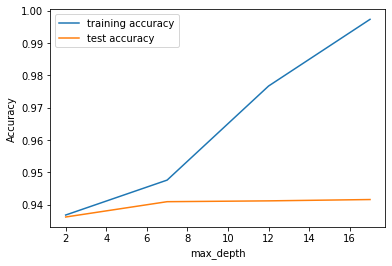

In [122]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**From above plot we got the maximum accuracy for max_depth = 7



In [123]:


print('Best Parameter:',rf.best_score_)
print('Best Score:',rf.best_params_)
      
      

Best Parameter: 0.9416262091369221
Best Score: {'max_depth': 17}


**Tuning of estimators


In [124]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.584287,0.030409,0.026224,0.002520,100,{'n_estimators': 100},0.939903,0.936338,0.940652,0.944218,...,0.940200,0.002508,4,0.941038,0.941675,0.940405,0.939832,0.940787,0.940747,0.000617
1,8.062543,0.249919,0.121741,0.005756,500,{'n_estimators': 500},0.940158,0.936847,0.939888,0.944218,...,0.940353,0.002348,1,0.940847,0.941738,0.940596,0.939832,0.940851,0.940773,0.000610
2,13.171610,0.328211,0.197014,0.011483,900,{'n_estimators': 900},0.940158,0.936593,0.939888,0.943963,...,0.940251,0.002344,2,0.940720,0.941738,0.940532,0.939896,0.940787,0.940735,0.000592
3,18.822754,0.552386,0.278318,0.013505,1300,{'n_estimators': 1300},0.940158,0.936593,0.940397,0.943709,...,0.940251,0.002253,2,0.940720,0.941738,0.940596,0.939896,0.940469,0.940684,0.000598


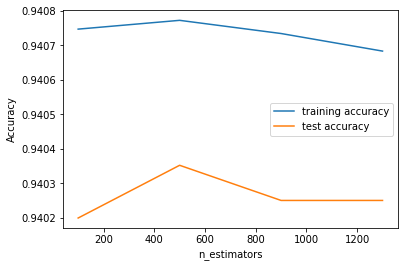

In [126]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
print('Best Parameter: ',rf.best_score_)
print('Best Score: ',rf.best_params_)


Best Parameter:  0.9403526742054206
Best Score:  {'n_estimators': 500}


#### It tends to overfit as the n_estimator value increases, we'll take n_estimator=500 for this


In [128]:
##### Tuning max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32]},
             return_train_score=True, scoring='accuracy')

In [129]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.747640,0.035107,0.022393,0.000920,4,{'max_features': 4},0.939394,0.936084,0.937086,0.943199,...,0.939436,0.002640,5,0.940337,0.941293,0.940660,0.939514,0.939386,0.940238,0.000714
1,1.287723,0.016312,0.021866,0.001350,8,{'max_features': 8},0.939903,0.936338,0.939633,0.943963,...,0.940149,0.002448,1,0.940528,0.941738,0.940723,0.939896,0.940596,0.940696,0.000594
2,2.067686,0.015259,0.020675,0.000346,14,{'max_features': 14},0.938885,0.936084,0.939888,0.942944,...,0.939589,0.002211,3,0.941038,0.942311,0.940469,0.940532,0.941042,0.941078,0.000662
3,2.856301,0.010989,0.020580,0.000259,20,{'max_features': 20},0.940413,0.935320,0.940143,0.942435,...,0.939436,0.002354,6,0.940465,0.943840,0.940596,0.940596,0.942060,0.941511,0.001303
4,3.441486,0.045789,0.020395,0.000644,24,{'max_features': 24},0.940158,0.935829,0.940397,0.942180,...,0.939487,0.002112,4,0.941229,0.943776,0.940660,0.941360,0.941296,0.941664,0.001085


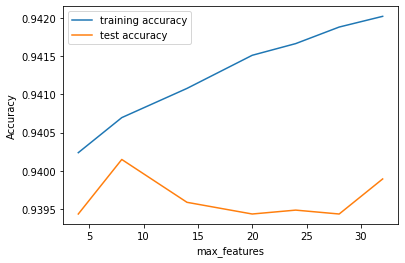

In [130]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
print('Best Parameter: ',rf.best_score_)
print('Best Score: ',rf.best_params_)

Best Parameter:  0.9401489433822897
Best Score:  {'max_features': 8}


##### Tuning min_samples_leaf

In [132]:


# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.921009,0.057135,0.034242,0.006373,50,{'min_samples_leaf': 50},0.940413,0.936084,0.941416,0.943454,...,0.939996,0.002505,3,0.942948,0.943266,0.942060,0.941742,0.941997,0.942403,0.000594
1,2.652842,0.107684,0.031392,0.001533,100,{'min_samples_leaf': 100},0.940158,0.935829,0.939124,0.943963,...,0.939385,0.002707,5,0.940337,0.941611,0.939768,0.940087,0.940914,0.940544,0.000653
2,2.382301,0.074218,0.029105,0.001119,150,{'min_samples_leaf': 150},0.940413,0.937102,0.939379,0.943963,...,0.940047,0.002238,2,0.940019,0.941611,0.940087,0.939386,0.940787,0.940378,0.000760
3,2.227846,0.046702,0.028663,0.000929,200,{'min_samples_leaf': 200},0.940158,0.935829,0.939633,0.944473,...,0.940149,0.002752,1,0.940146,0.941229,0.940341,0.939577,0.940405,0.940340,0.000532
4,2.241516,0.141085,0.028822,0.001062,250,{'min_samples_leaf': 250},0.940158,0.936338,0.938360,0.943963,...,0.939792,0.002515,4,0.940019,0.940974,0.939768,0.939259,0.940214,0.940047,0.000563


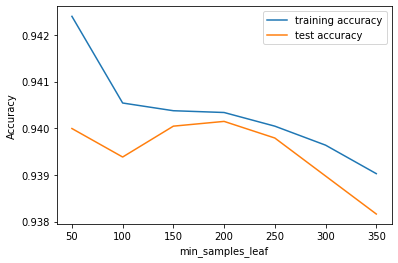

In [134]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
print('Best Parameter: ',rf.best_score_)
print('Best Score: ',rf.best_params_)

Best Parameter:  0.9401489563546439
Best Score:  {'min_samples_leaf': 200}


In [136]:
##### Tuning min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [137]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.874547,0.077353,0.034000,0.001856,200,{'min_samples_split': 200},0.939649,0.936847,0.940907,0.943454,...,0.940098,0.002140,6,0.942439,0.943521,0.941742,0.941105,0.942060,0.942174,0.000803
1,3.781883,0.097439,0.032185,0.001210,250,{'min_samples_split': 250},0.939649,0.936593,0.940143,0.944218,...,0.940098,0.002429,5,0.940974,0.941929,0.940851,0.940723,0.941487,0.941193,0.000450
2,3.787368,0.127198,0.031113,0.000603,300,{'min_samples_split': 300},0.940158,0.936593,0.940397,0.943454,...,0.940251,0.002183,2,0.940911,0.941802,0.940851,0.940150,0.940787,0.940900,0.000527
3,3.848883,0.198788,0.036121,0.003911,350,{'min_samples_split': 350},0.939649,0.936593,0.939633,0.944473,...,0.940251,0.002545,1,0.940465,0.941866,0.940532,0.939896,0.940405,0.940633,0.000656
4,3.764376,0.145173,0.032055,0.002136,400,{'min_samples_split': 400},0.939903,0.936084,0.940143,0.943454,...,0.940098,0.002369,4,0.940528,0.941675,0.940596,0.939641,0.940341,0.940556,0.000654


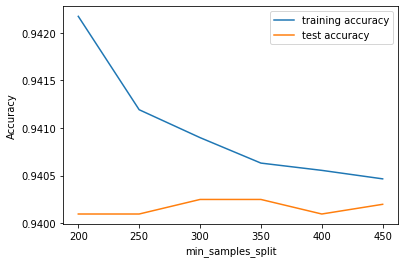

In [138]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [139]:
print('Best Parameter: ',rf.best_score_)
print('Best Score: ',rf.best_params_)

Best Parameter:  0.9402508282523865
Best Score:  {'min_samples_split': 350}


**Fitting the Random Forest model with the best parameters 

In [140]:


# model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=50, 
                             min_samples_split=250,
                             max_features=24,
                             n_estimators=500)

In [141]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=24, min_samples_leaf=50,
                       min_samples_split=250, n_estimators=500)

In [142]:
# predict
y_pred = rfc.predict(X_test)

In [143]:
#printing classifiation report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7750
           1       0.76      0.46      0.57       665

    accuracy                           0.95      8415
   macro avg       0.86      0.72      0.77      8415
weighted avg       0.94      0.95      0.94      8415



In [144]:
#Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7651   99]
 [ 359  306]]


In [145]:
print('Precision:\t',round(precision_score(y_test, y_pred, average="macro"),5))
print('Recall:\t\t',round(recall_score(y_test, y_pred, average="macro"),5)) 
print("ROC AUC Score:\t", round(roc_auc_score(y_test, y_pred),5))

Precision:	 0.85537
Recall:		 0.72369
ROC AUC Score:	 0.72369


In [146]:
print ('Accuracy Score for Random Forest Unbalanced Data:',metrics.accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest Unbalanced Data: 0.9455733808674985


#### Random forest on balanced data

In [147]:

# model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=50, 
                             min_samples_split=250,
                             max_features=24,
                             n_estimators=500)

In [148]:
# fit

rfc.fit(X_train_bal,y_train_bal)

RandomForestClassifier(max_depth=7, max_features=24, min_samples_leaf=50,
                       min_samples_split=250, n_estimators=500)

In [149]:
# predict
y_pred = rfc.predict(X_test)

In [150]:
#printing classifiation report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7750
           1       0.43      0.78      0.56       665

    accuracy                           0.90      8415
   macro avg       0.71      0.85      0.75      8415
weighted avg       0.94      0.90      0.91      8415



In [151]:
#Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7064  686]
 [ 143  522]]


In [152]:
print('Precision:\t',round(precision_score(y_test, y_pred, average="macro"),5))
print('Recall:\t\t',round(recall_score(y_test, y_pred, average="macro"),5)) 
print("ROC AUC Score:\t", round(roc_auc_score(y_test, y_pred),5))

Precision:	 0.70614
Recall:		 0.84822
ROC AUC Score:	 0.84822


In [153]:
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest Final Model : 0.9014854426619132


## Top 10 features affecting our churn rate

<AxesSubplot:>

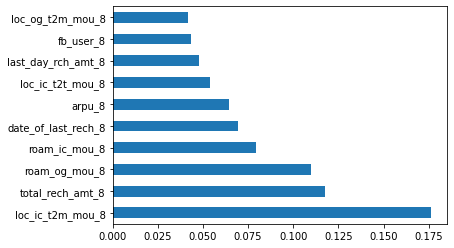

In [154]:
#Plotting the top 10 features
df_proj = df_modelling_data
# Scaling the variables
cols =df_proj.columns.values
df_proj = pd.DataFrame(scaler.transform(df_proj))
df_proj.columns = cols

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=df_proj.columns.values)
weights.sort_values(ascending=False)[:10].plot(kind='barh')

## 5. Model Evaluation

**We have build and trained different models.Lets compare the model metrics.Let's create a visualize a table to compare their different evaluation metrics.

In [155]:
model_performances = pd.DataFrame({
    "Model" : [ "Basic Logistic Regression (Unbalanced Data)", "Logistic Regression with PCA (Balanced Data)","Logistic regression with PCA and hyperparametertuning(Balaced Data)","Random ForestUsing default parameters (Balanced Data)",
              "Random Forestwith Hyperparameter Tuning (Unbalanced Data)","Random Forestwith Hyperparameter Tuning(Balanced Data)"],
    "Accuracy" : ["0.93190", "0.83921","0.83921","0.93654","0.90148","0.90148"],
    "Precision" : [ "0.78755","0.64476","0.64476","0.78002","0.70589","0.70589"],
    "Recall" : [ "0.65921", "0.83228","0.83228","0.79989","0.84685","0.84685"],
    "ROC AUC Score" : [ "0.65921", "0.83228","0.83228","0.79989","0.84685","0.84685"]
})

In [156]:
pd.set_option('display.max_colwidth',-1)
model_performances

,Model,Accuracy,Precision,Recall,ROC AUC Score
0,Basic Logistic Regression (Unbalanced Data),0.93190,0.78755,0.65921,0.65921
1,Logistic Regression with PCA (Balanced Data),0.83921,0.64476,0.83228,0.83228
2,Logistic regression with PCA and hyperparametertuning(Balaced Data),0.83921,0.64476,0.83228,0.83228
3,Random ForestUsing default parameters (Balanced Data),0.93654,0.78002,0.79989,0.79989
4,Random Forestwith Hyperparameter Tuning (Unbalanced Data),0.90148,0.70589,0.84685,0.84685
5,Random Forestwith Hyperparameter Tuning(Balanced Data),0.90148,0.70589,0.84685,0.84685


### As per our analysis:
Logistic regression with PCA and hyperparameter tuning(Balaced Data) and Random Forest with Hyperparameter Tuning(Balanced Data) has good ROC AUC Score  and these  models can be selected to predict churn data for future dataset or in production environment.

## 6. Observations & Recommendations


#### Observations

•The churn for High value customers is less, as it is ~8%

•Huge drop is visible in total amount recharge and number of the times customers recharge during the action phase for the churn customers. It seems to be one of the main indicator to churn

•Avg. revenue per user seems to be most important feature in determining churn prediction. In the action phase revenue has reduced.

•Incoming and Outgoing Calls on roaming during Action phase are strong indicators of churn behavior.

•Local Incoming calls from other network operator is also an indicator to churn

•The last day and date  which customer does recharge is also one of the strong indicator for churn

•2G/3G data usage of churned customers are very less during the action phase.

•Customers with more than 6 months of tenure are more likely to churn

•Customers opted for Service scheme to avail only Facebook or other social network sites are more likely to churn.

#### Recommendations

•Telecom operator need to work on 2G/3G coverage area. Operator need to provide better coverage.

•Service provider need to work on roaming free option for churned customers like unlimited incoming/outgoing calls while roaming

•Operator can increase limit of free minutes per day

•Operator can come up with carry forward option for data plan

•Operator can come with separate package for voice/data/Combo(voice+data) and provide offers separately for each package.

#### --- End of Assignment ---